In [2]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.381-b09, mixed mode)
  Starting server from C:\Users\alcarachin\Desktop\autoML_test\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ALCARA~1\AppData\Local\Temp\tmpuh3sue18
  JVM stdout: C:\Users\ALCARA~1\AppData\Local\Temp\tmpuh3sue18\h2o_alcarachin_started_from_python.out
  JVM stderr: C:\Users\ALCARA~1\AppData\Local\Temp\tmpuh3sue18\h2o_alcarachin_started_from_python.err


C:\Users\alcarachin\Desktop\autoML_test\venv\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,3 months and 20 days
H2O_cluster_name:,H2O_from_python_alcarachin_r5fcbx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [4]:
data = h2o.import_file(path='data.csv')
data = data.drop('timestamp', axis=1)
train, test = data.split_frame(ratios=[.8])

x = train.columns
y = "cnt"
x.remove(y)

train.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
182,3,2,93,6,3,0,1,3
138,3,2.5,93,5,1,0,1,3
72,2,2,100,0,1,0,1,3
47,2,0,93,6.5,1,0,1,3
46,2,2,93,4,1,0,1,3
51,1,-1,100,7,4,0,1,3
301,2,-0.5,100,9,3,0,1,3
528,3,-0.5,93,12,3,0,1,3
727,2,-1.5,100,12,3,0,1,3
862,2,-1.5,96.5,13,4,0,1,3


In [ ]:
aml = H2OAutoML(seed=1)
aml.train(x=x, y=y, training_frame=train)

lb = aml.leaderboard
lb.head(rows=lb.nrows)


aml.leader

AutoML progress: |
14:59:34.65: AutoML: XGBoost is not available; skipping it.
██████████████████████████████████████████████████████████████

In [7]:
# SAVE MODEL

model_path = h2o.save_model(model=aml.leader, path="./h20_model/leader_model", force=True)

In [9]:
# LOAD MODEL
model_path = "./h20_model/leader_model"
aml = h2o.load_model(model_path)

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Illegal argument: dir of function: importModel: water.api.FSIOException: FS IO Failure: 
 accessed path : file:/C:/Users/alcarachin/Desktop/autoML_test/london_bike_sharing/./h20_model/leader_model/ msg: File not found
  Request: POST /99/Models.bin/
    data: {'dir': './h20_model/leader_model'}


In [17]:
try:
    preds = aml.leader.predict(test)
except:
    preds = aml.predict(test)

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 1,1 KB is much larger than total cluster memory of Zero  , please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'AutoML_3_20240228_124433_leaderboard', 'parse_type': 'CSV', 'separator': '44', 'check_header': '1', 'number_columns': '7', 'chunk_size': '4194304', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["string","string","double","double","double","double","double"]', 'force_col_types': 'False', 'single_quotes': 'False', 'escapechar': '0', 'column_names': '["","model_id","rmse","mse","mae","rmsle","mean_residual_deviance"]', 'source_frames': '["upload_8d4fe3f9cc840eda484fb666a4ba408a"]'}


In [18]:
test[y].head()

cnt
72
131
727
916
178
1342
2761
324
635
212


In [15]:
preds.head()

predict
196.139
248.512
479.539
429.285
245.494
1325.9
1214.95
685.387
1128.45
739.571


In [25]:
acc = sum((preds['predict'] == test[y]).as_data_frame()['predict'].to_numpy()) / len(test)
print(f'Accuracy on test data: {acc}')

Accuracy on test data: 0.9775


No model with variable importance. Selecting all features to explain.


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

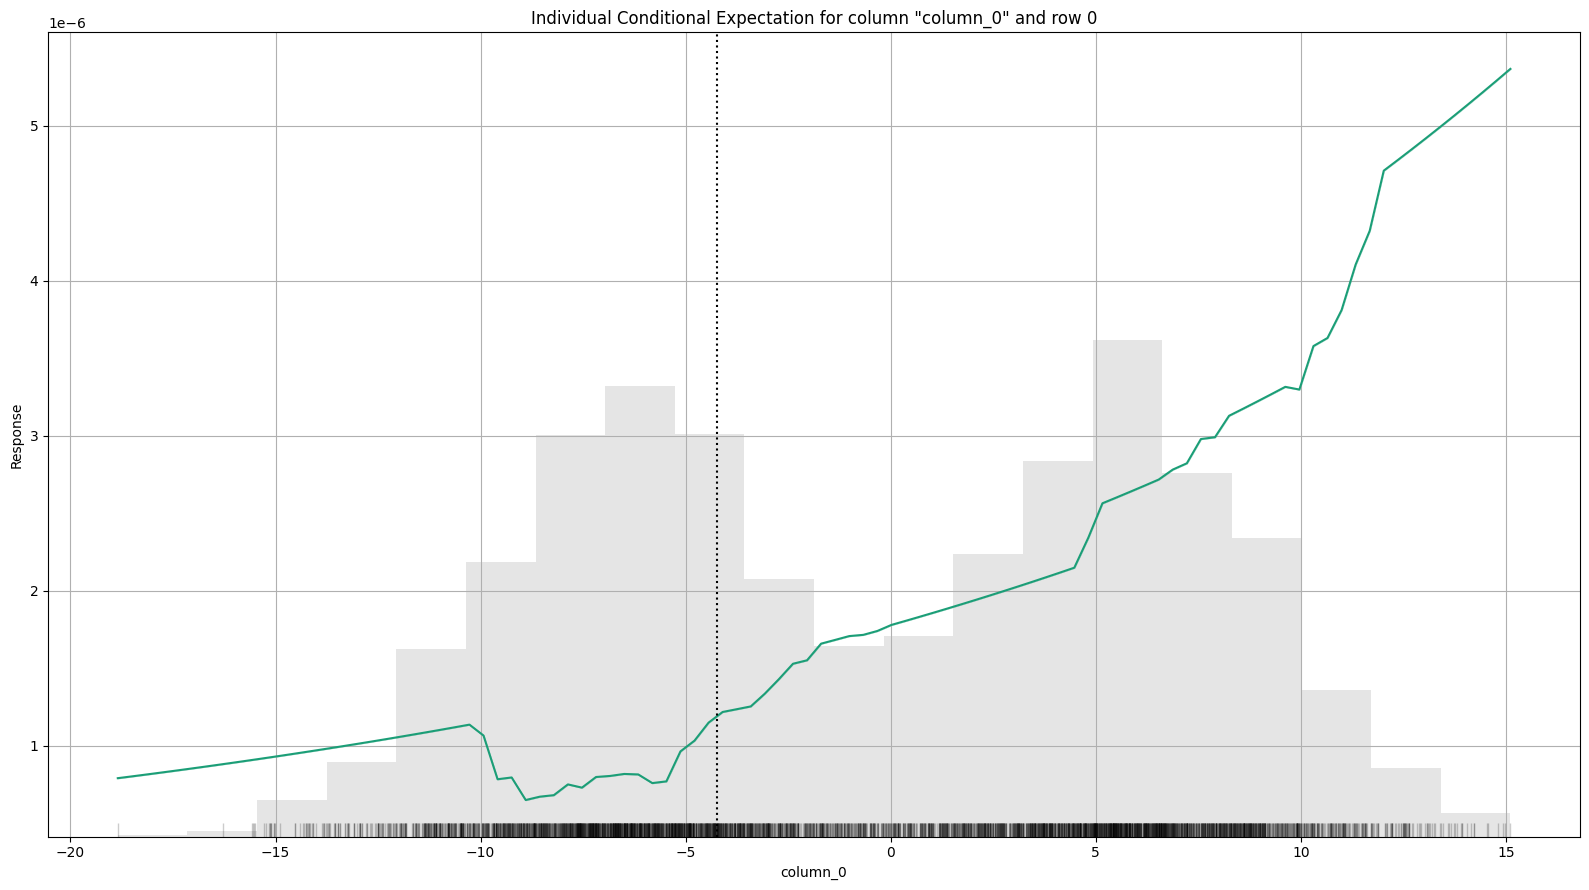

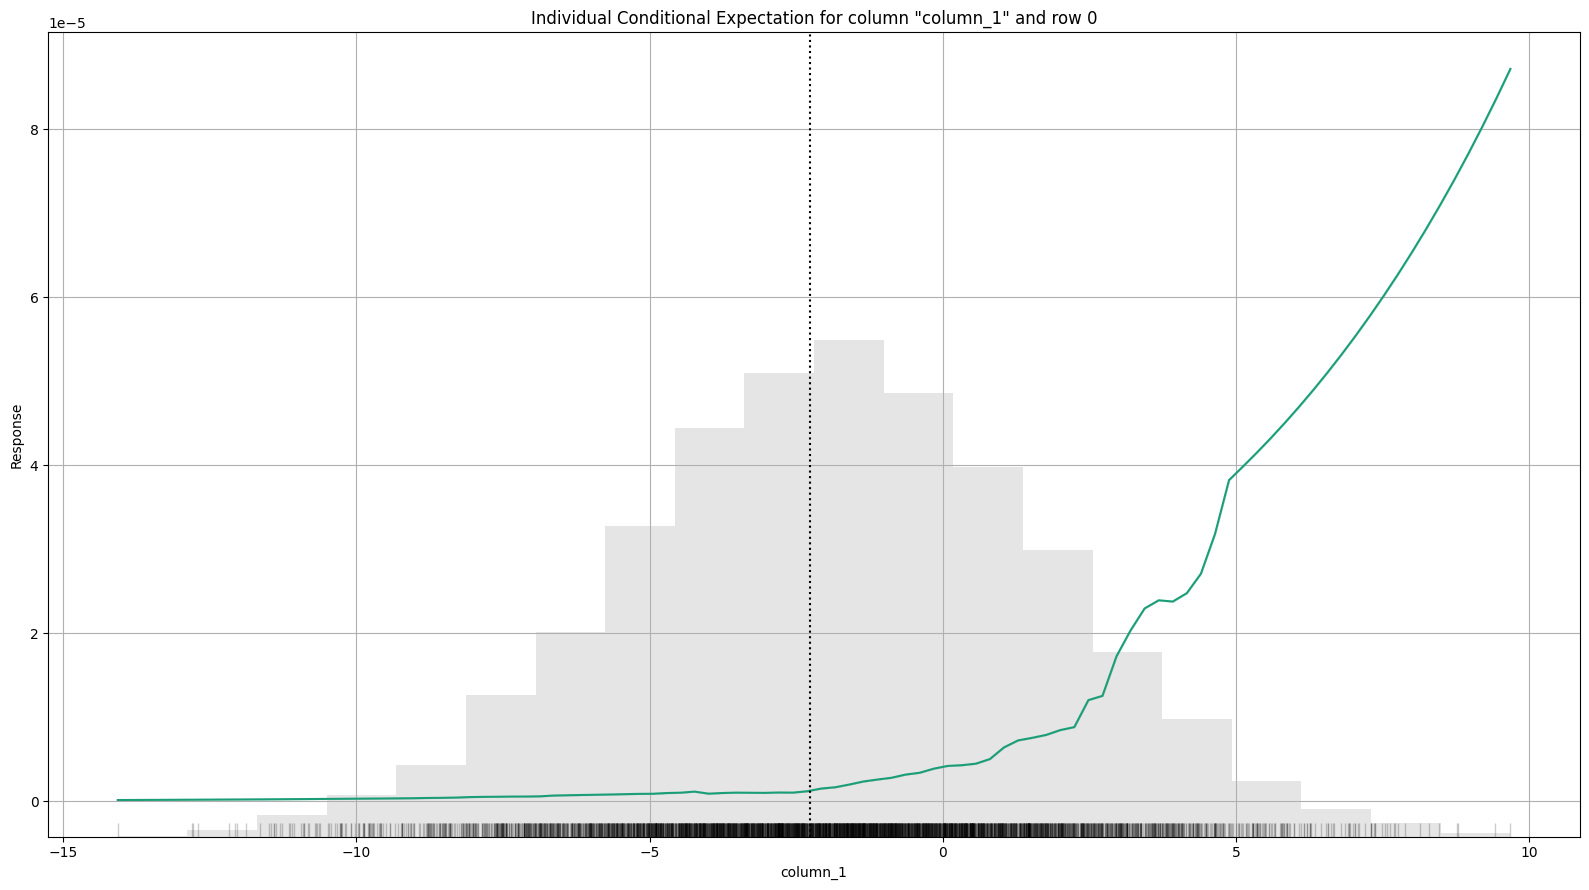

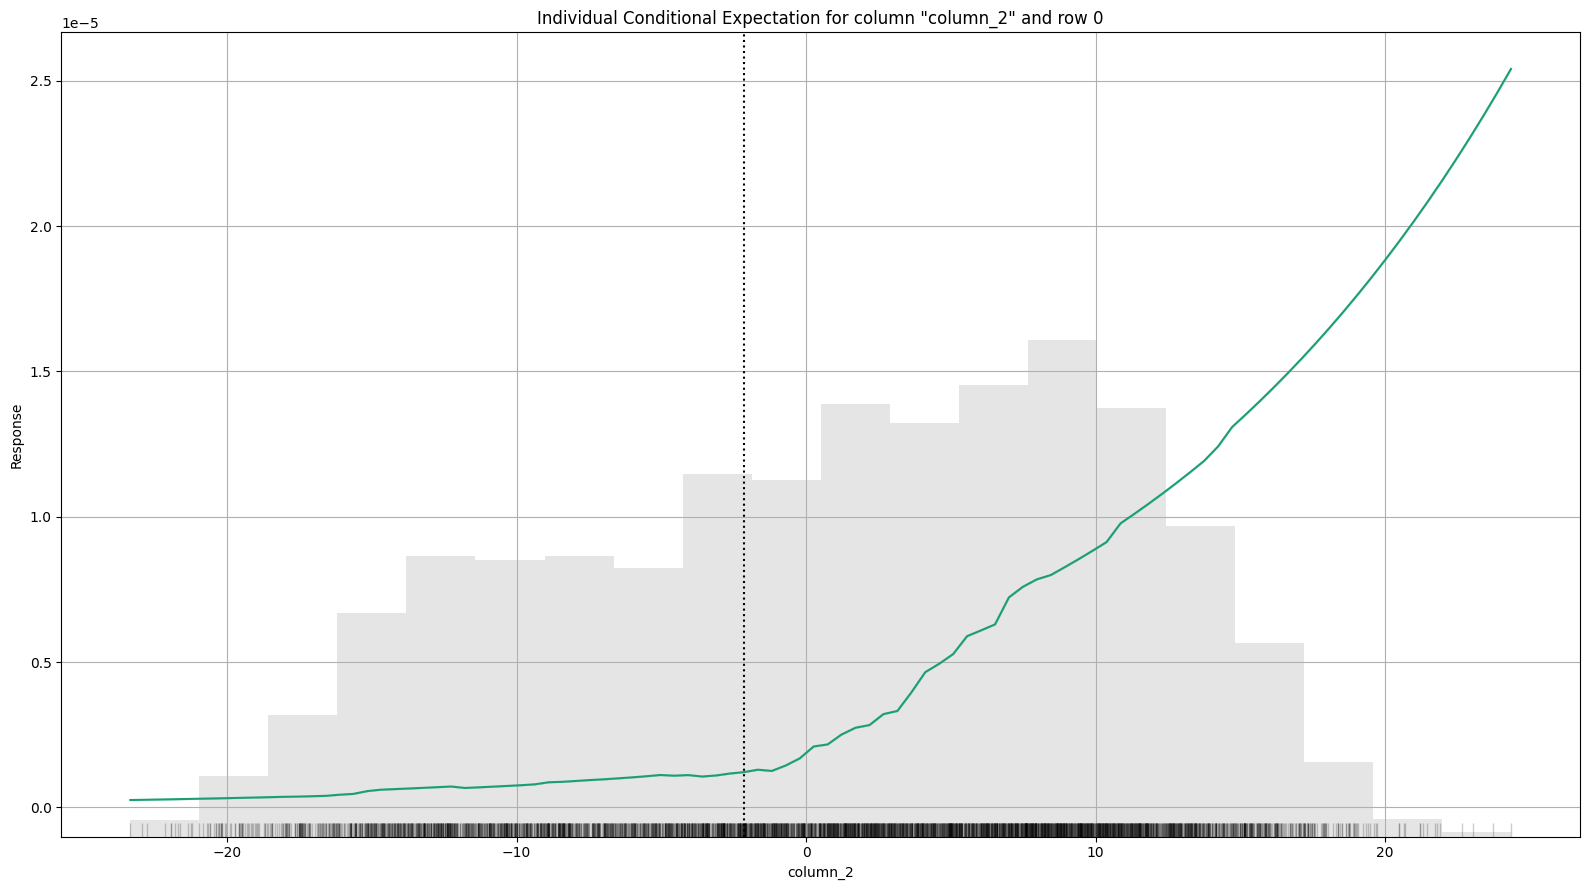

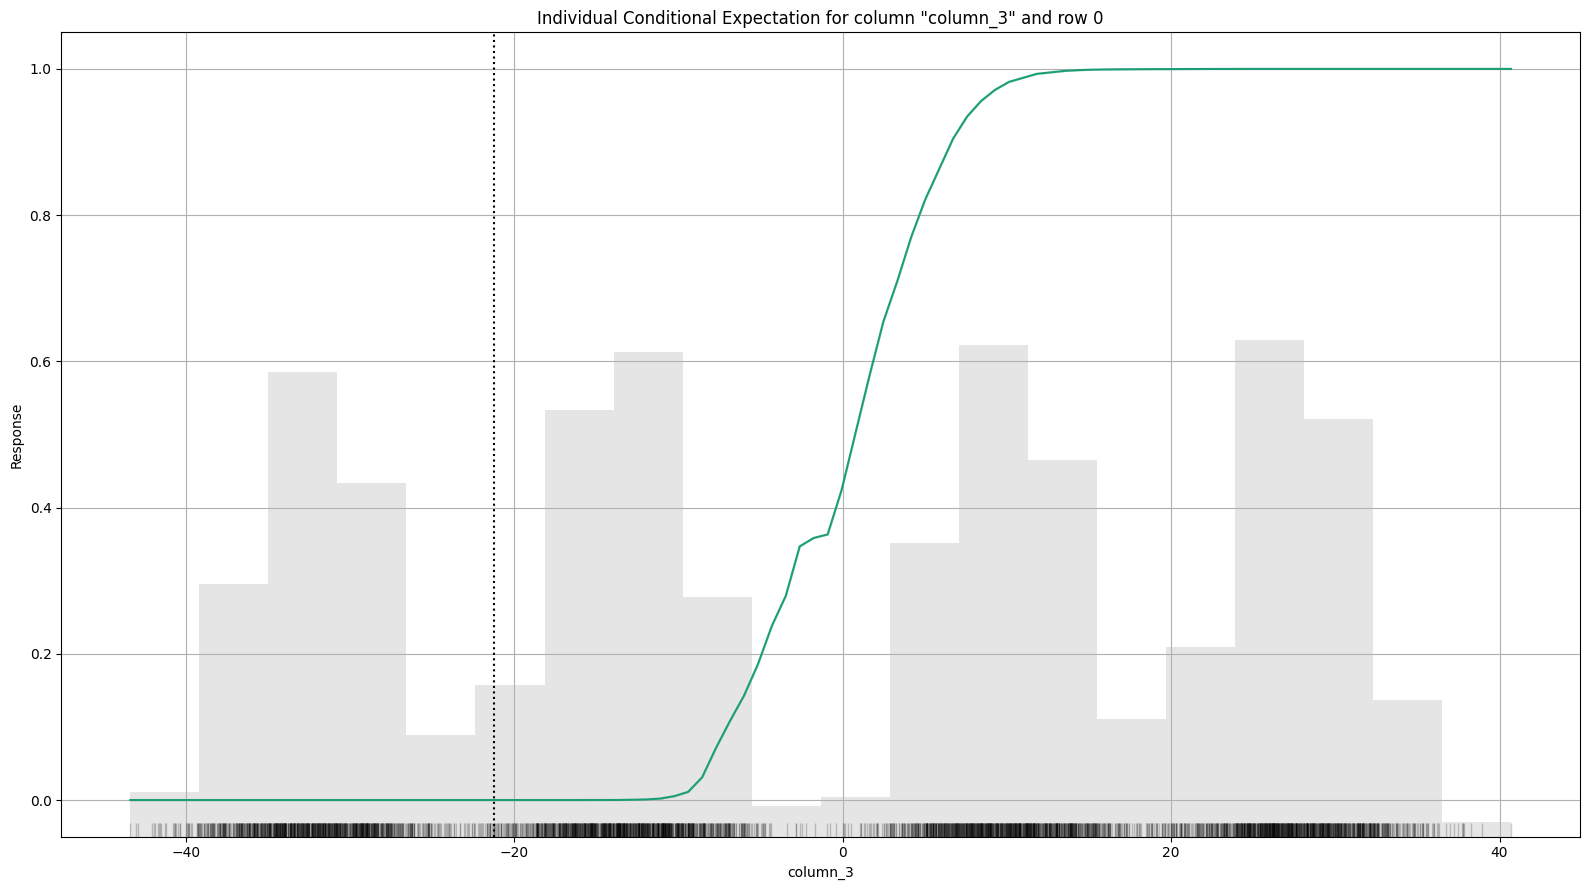

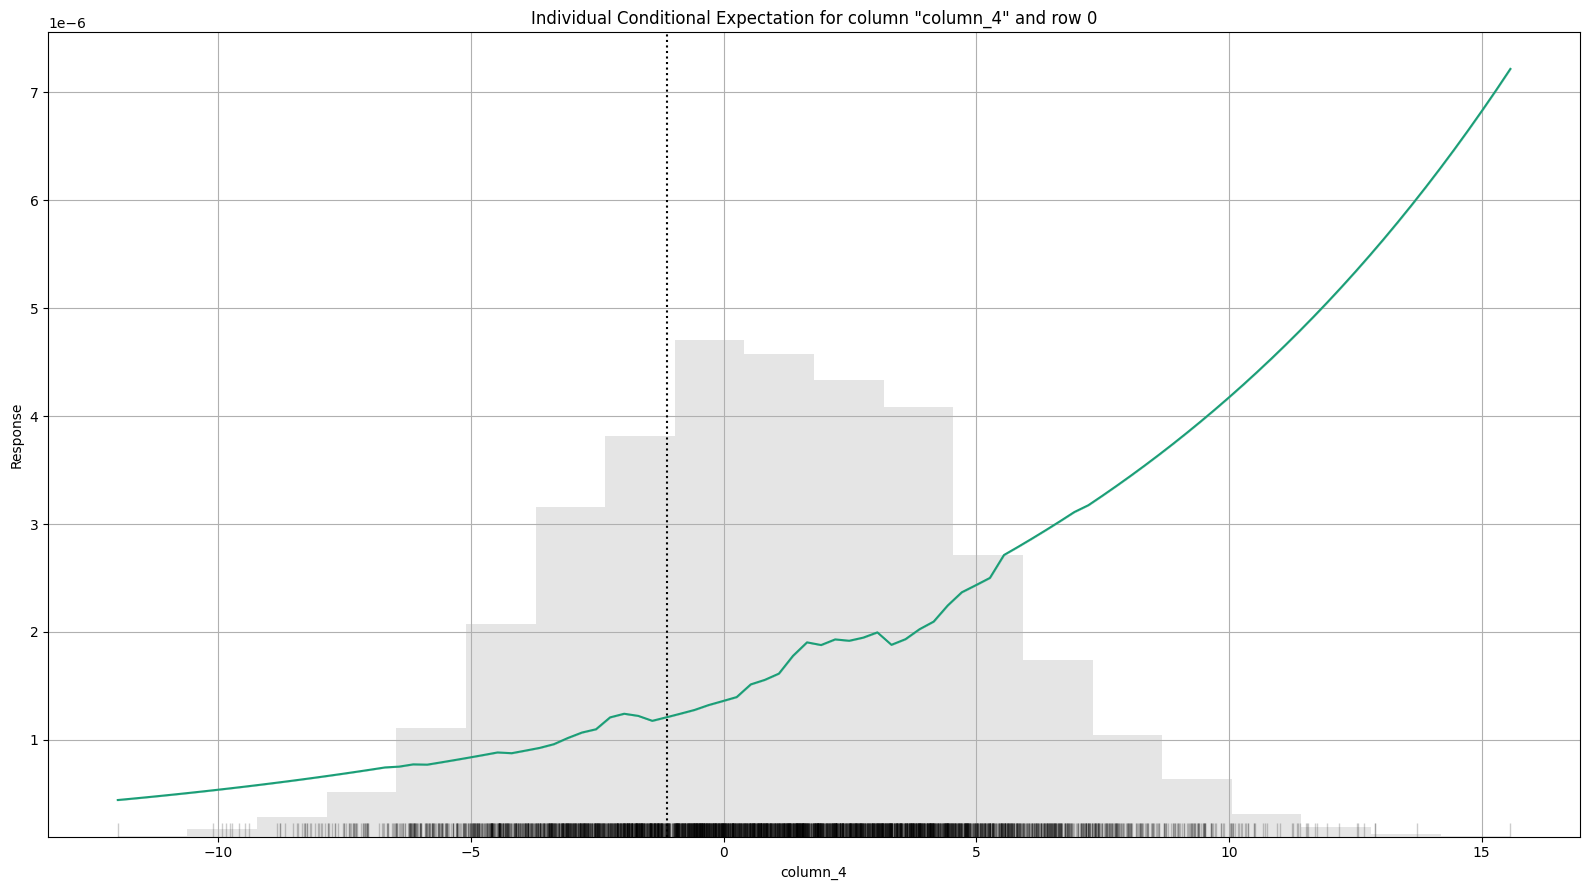

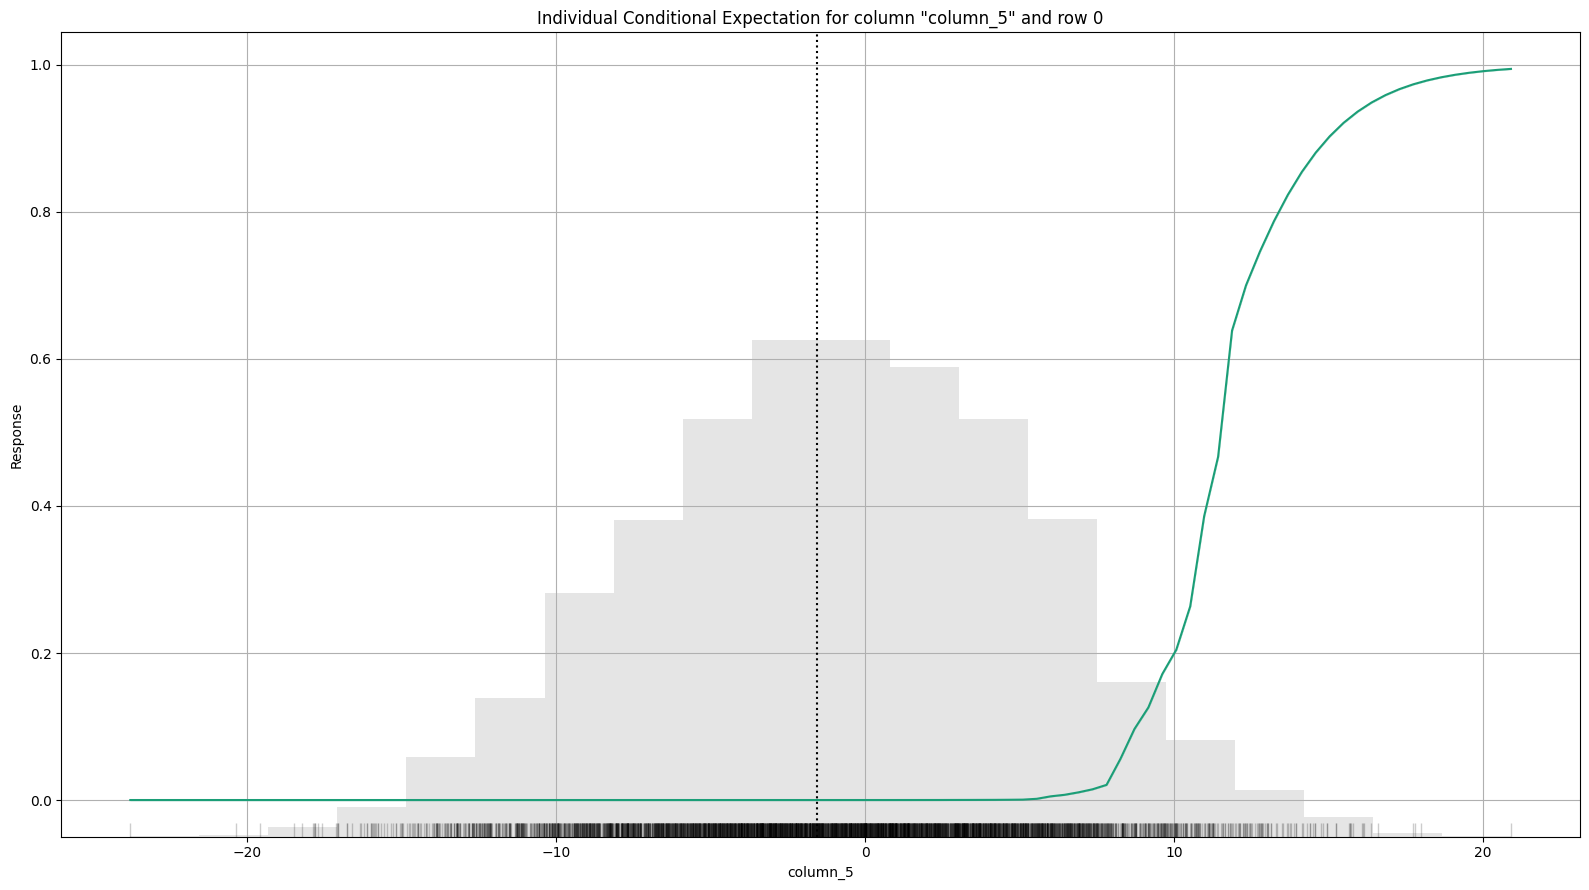

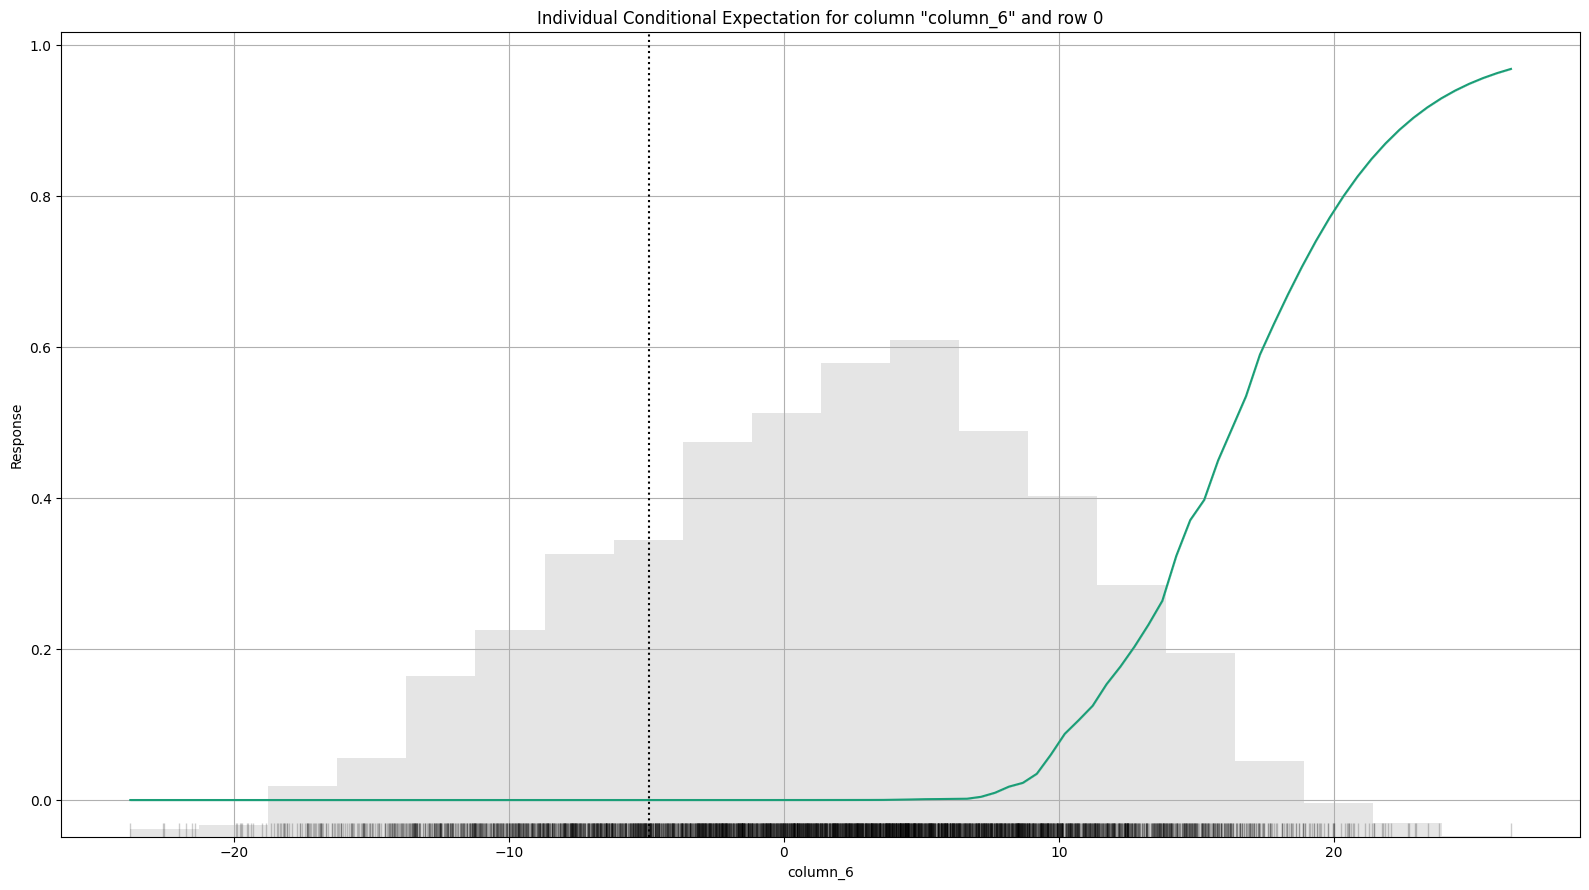

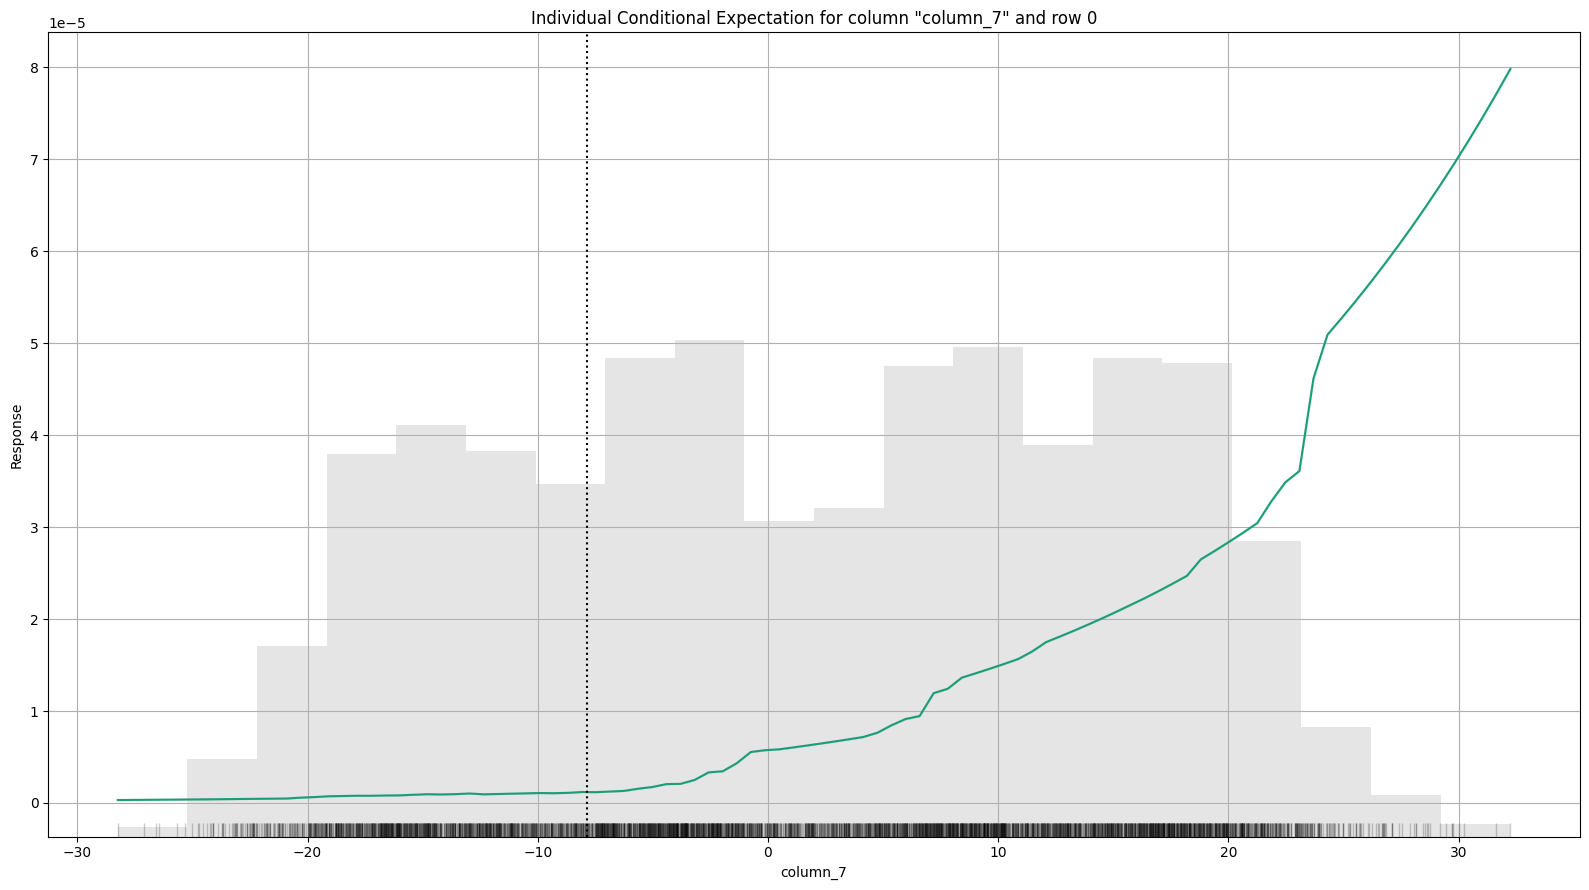

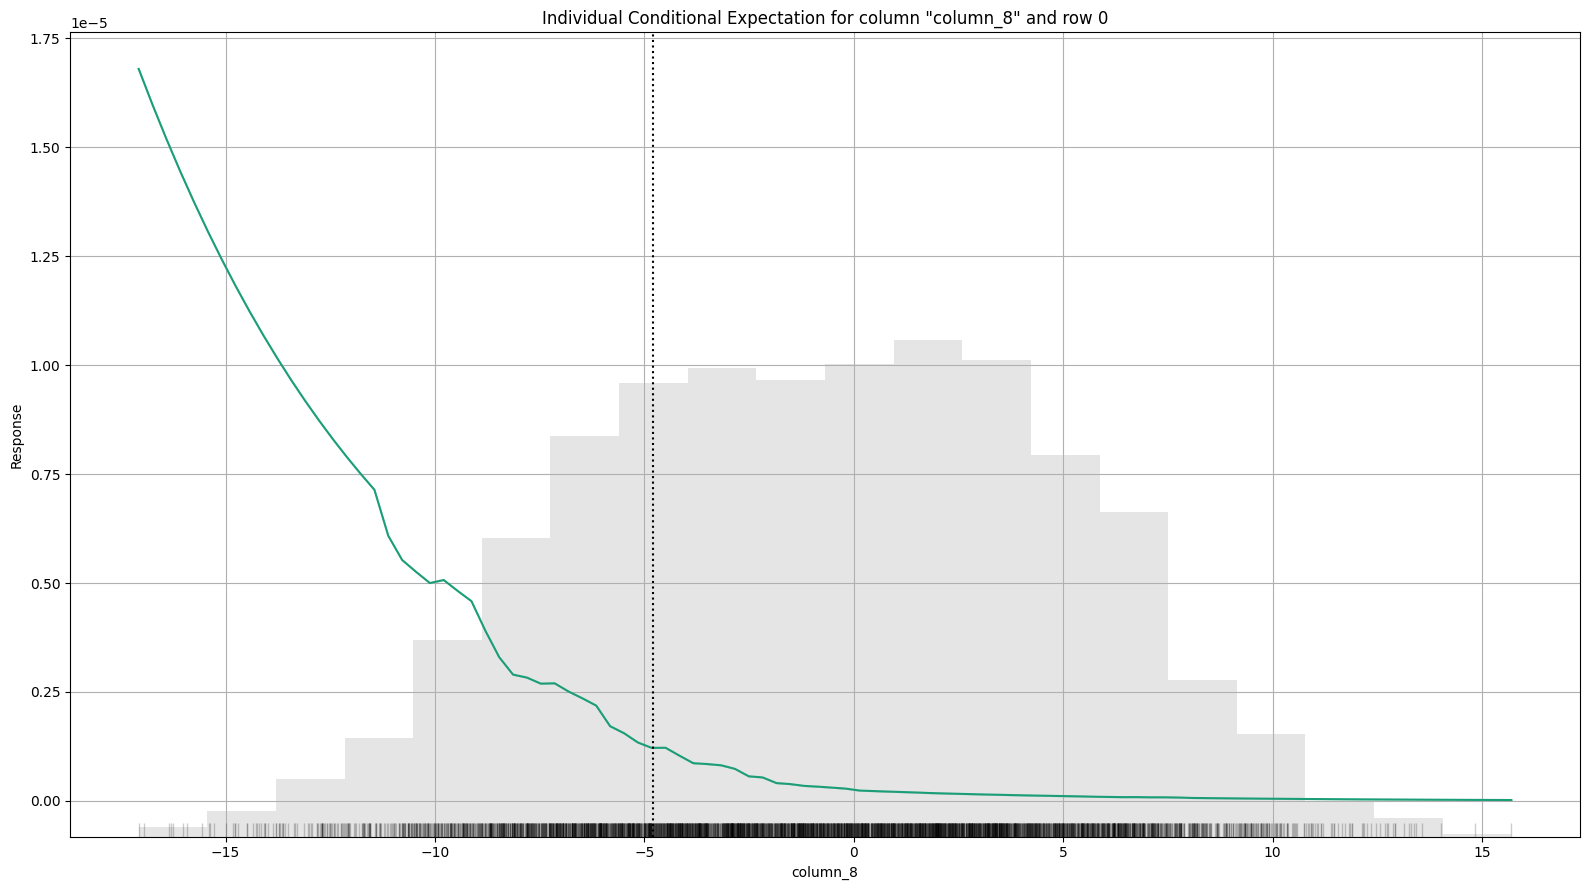

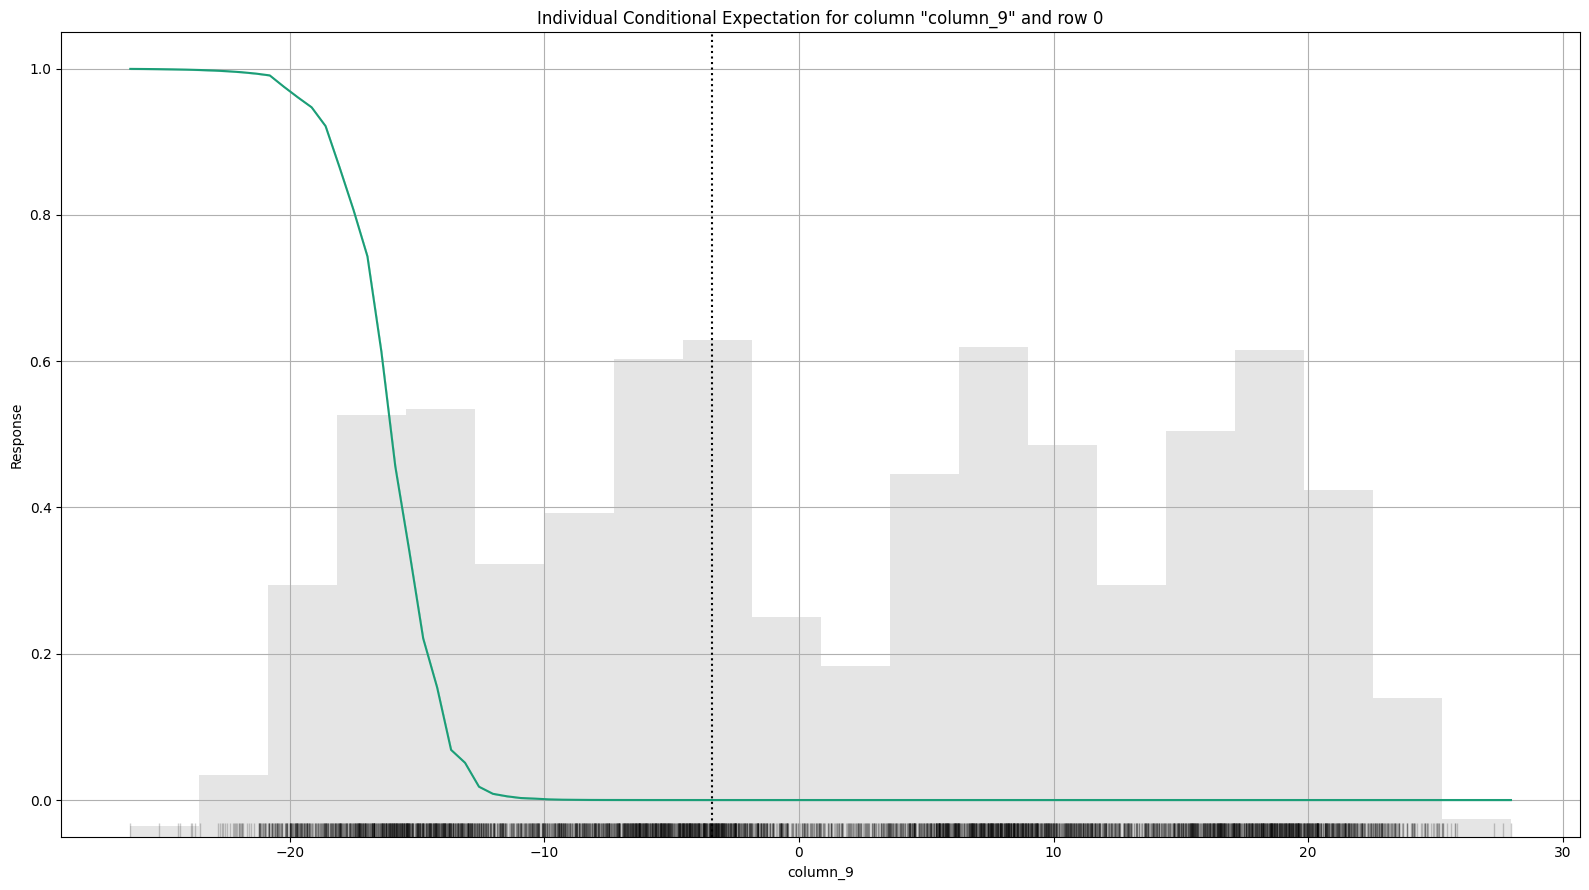

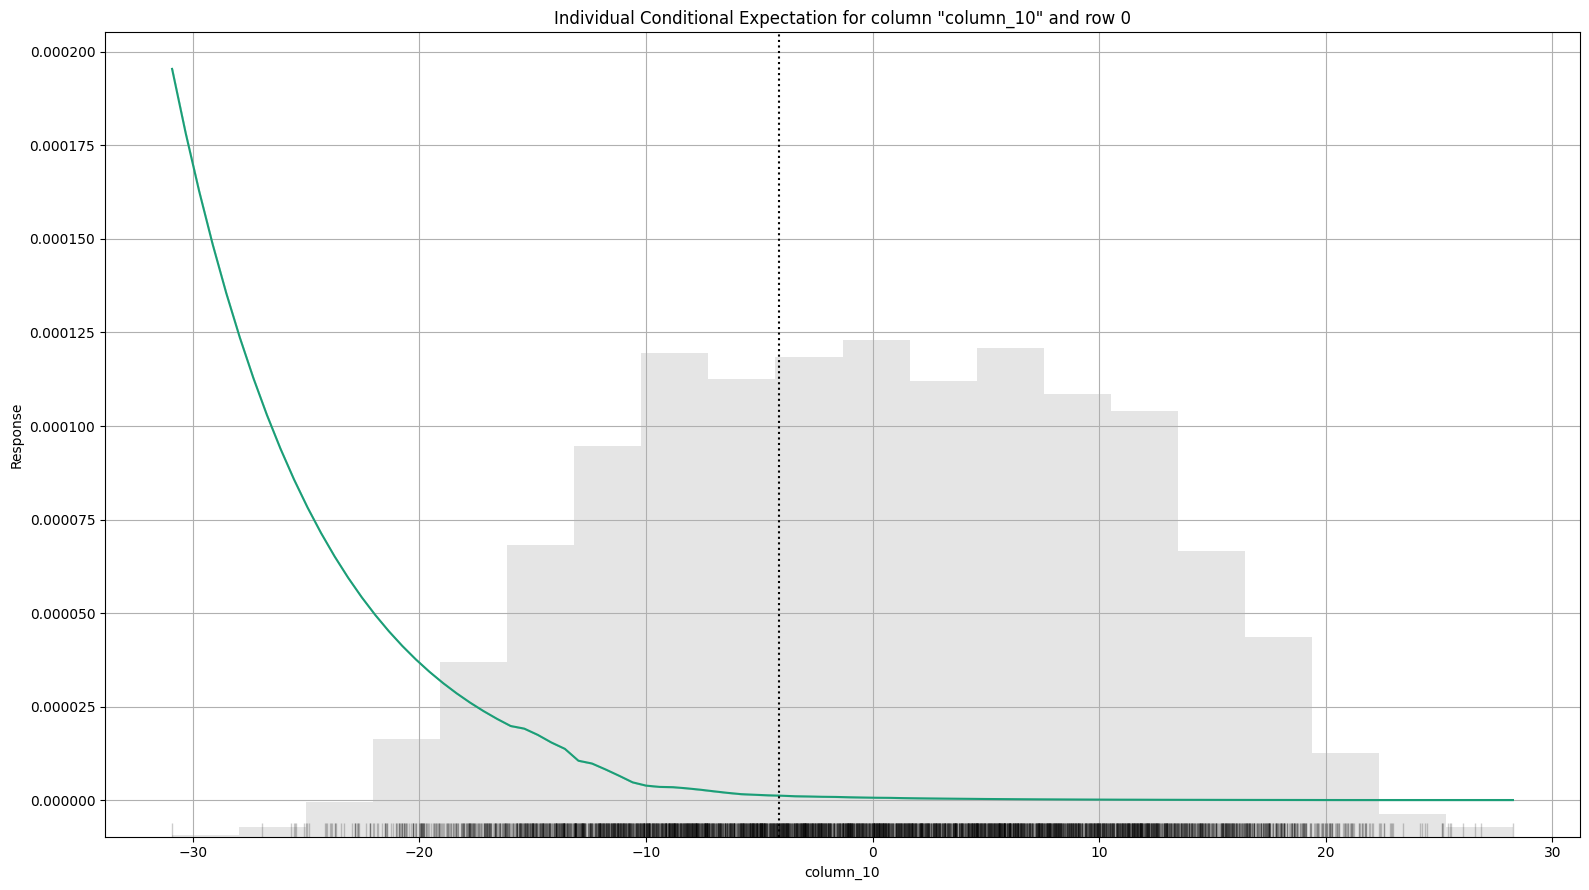

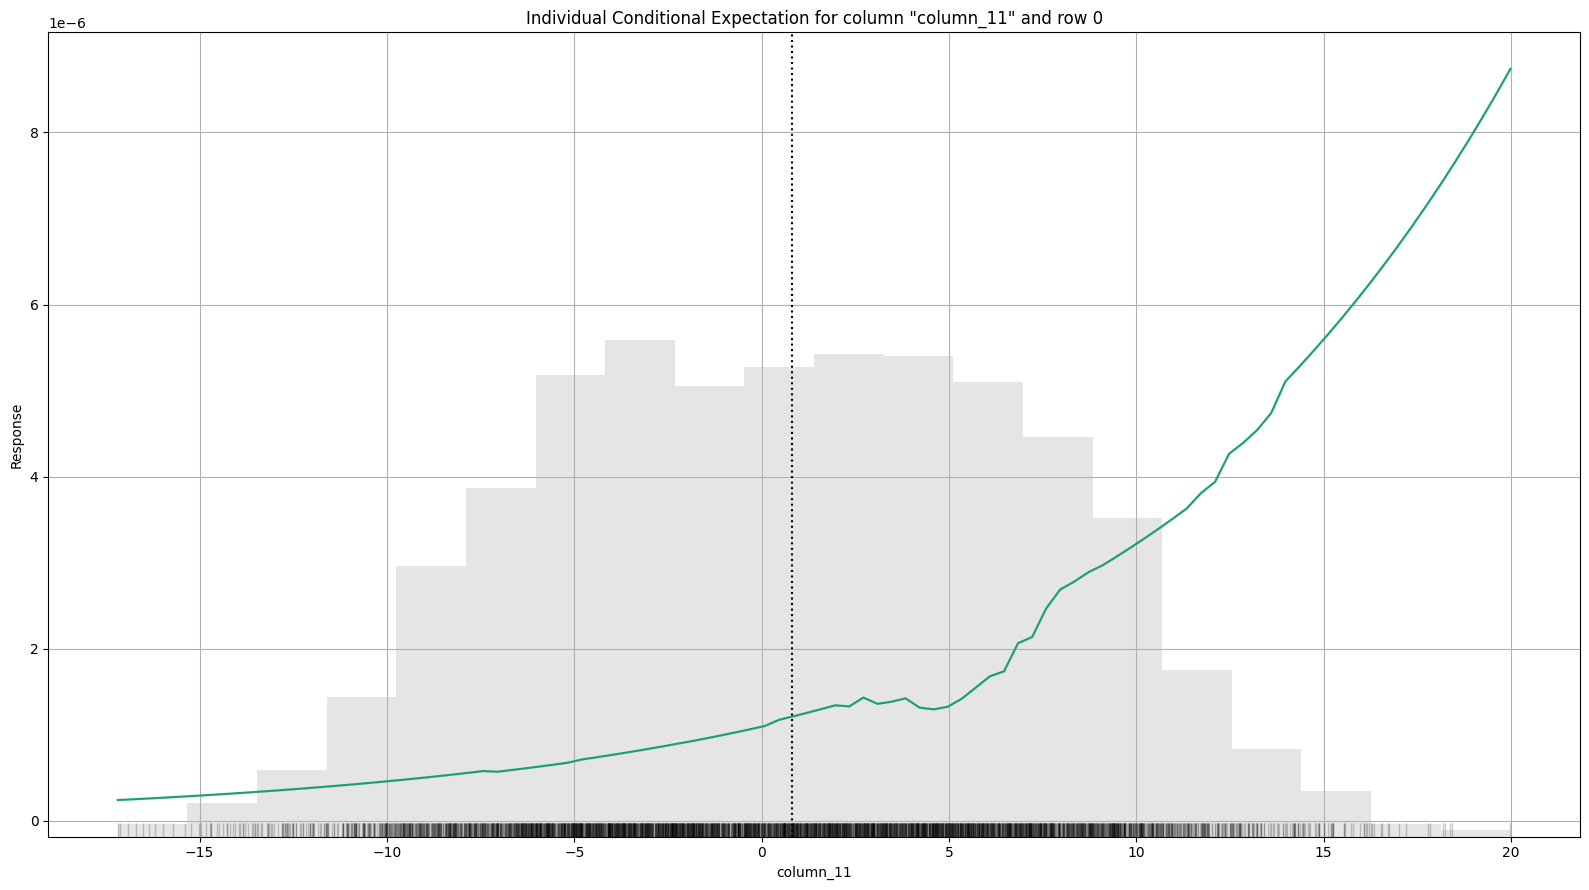

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

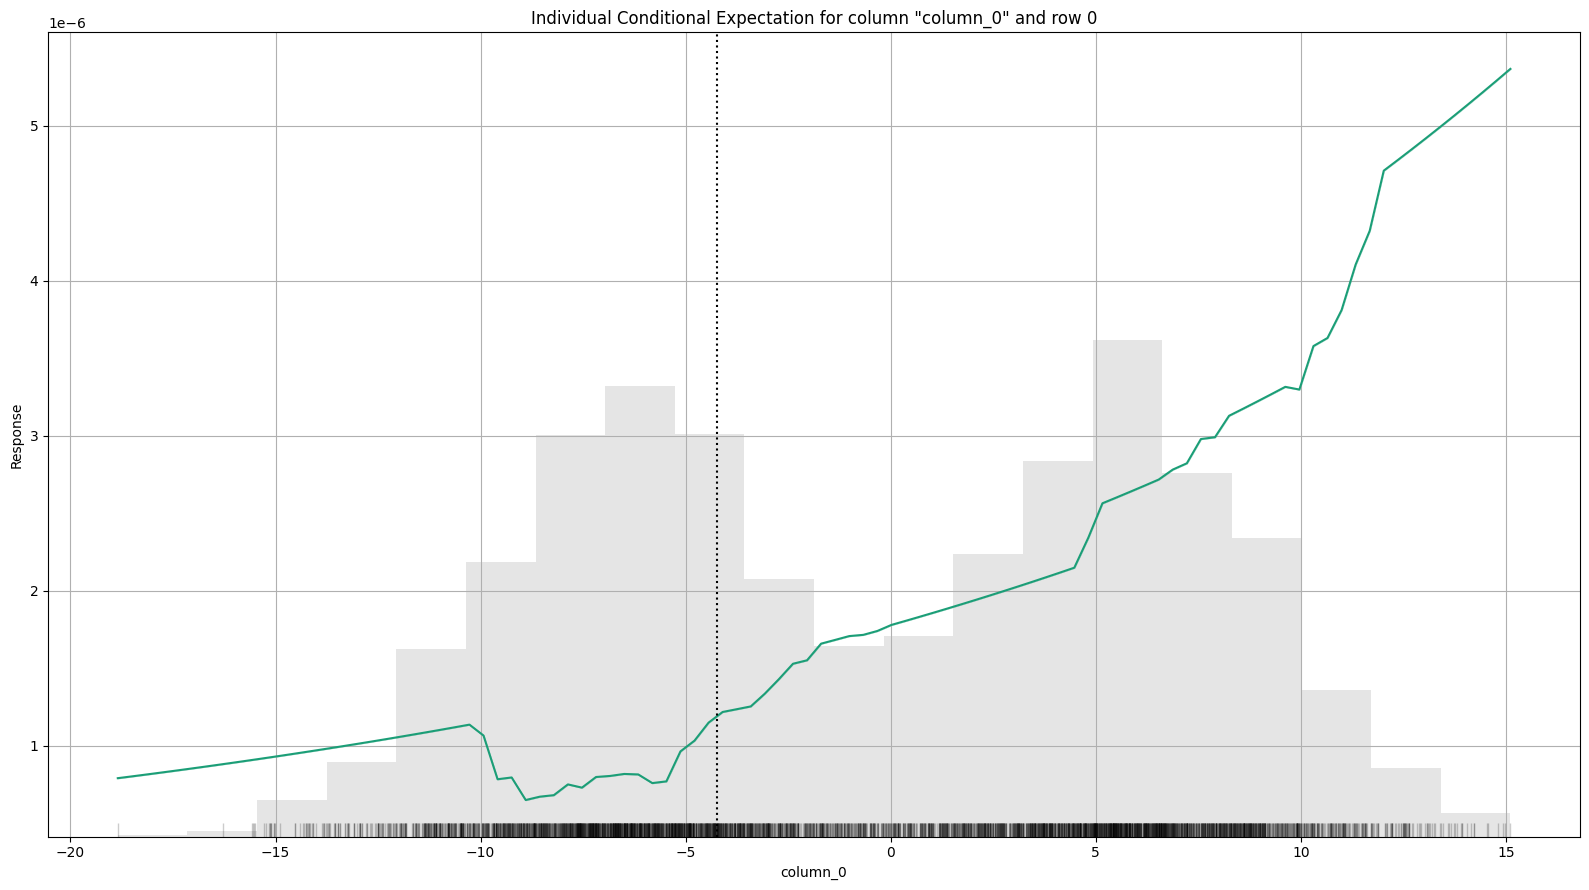

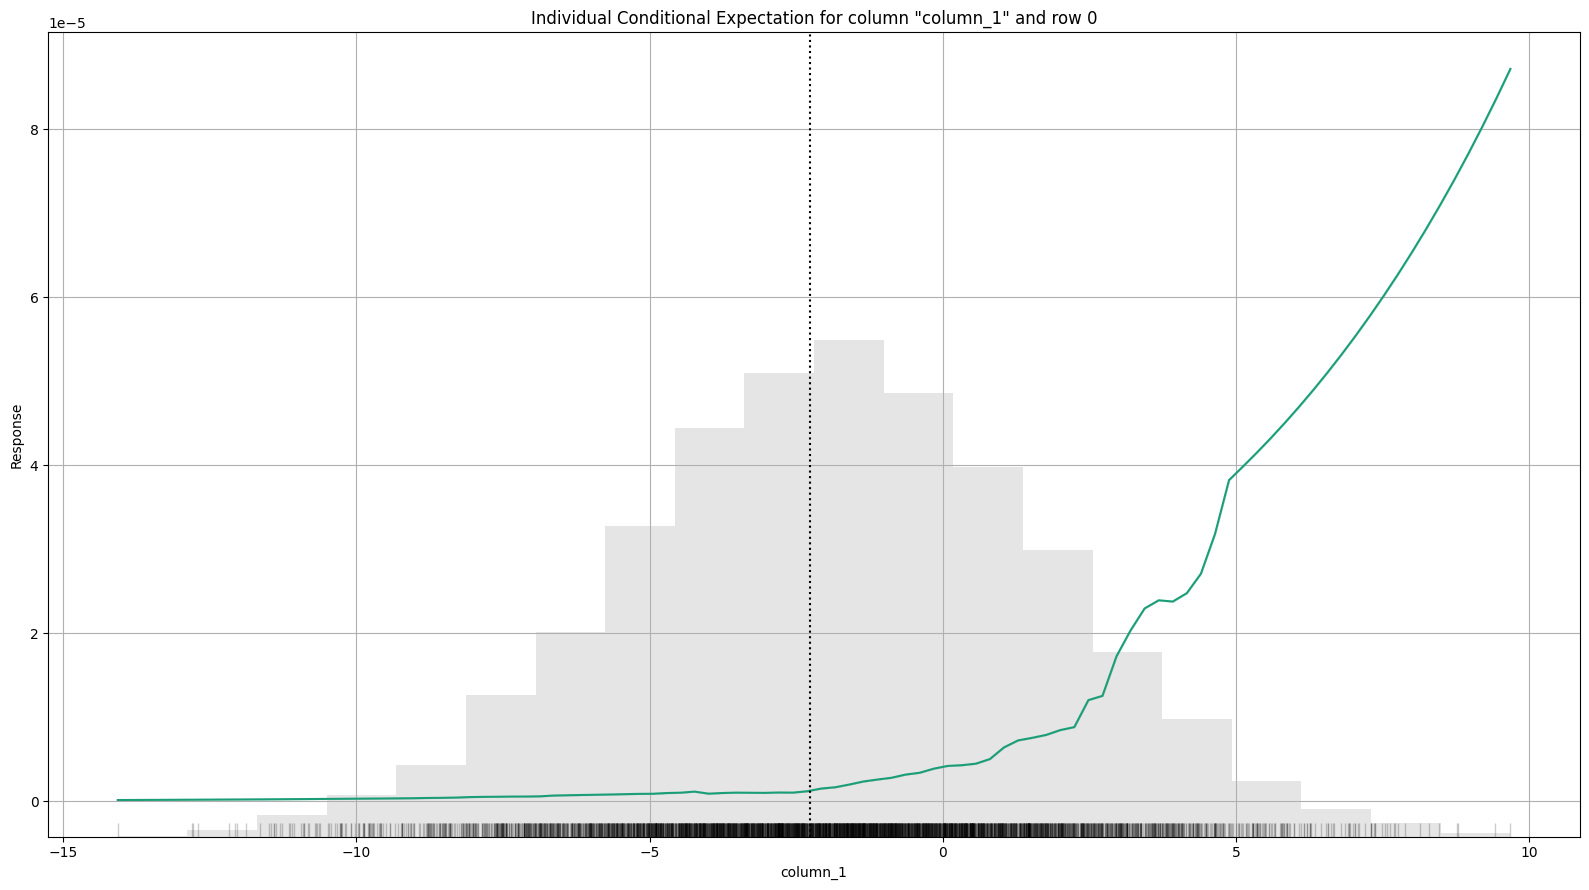

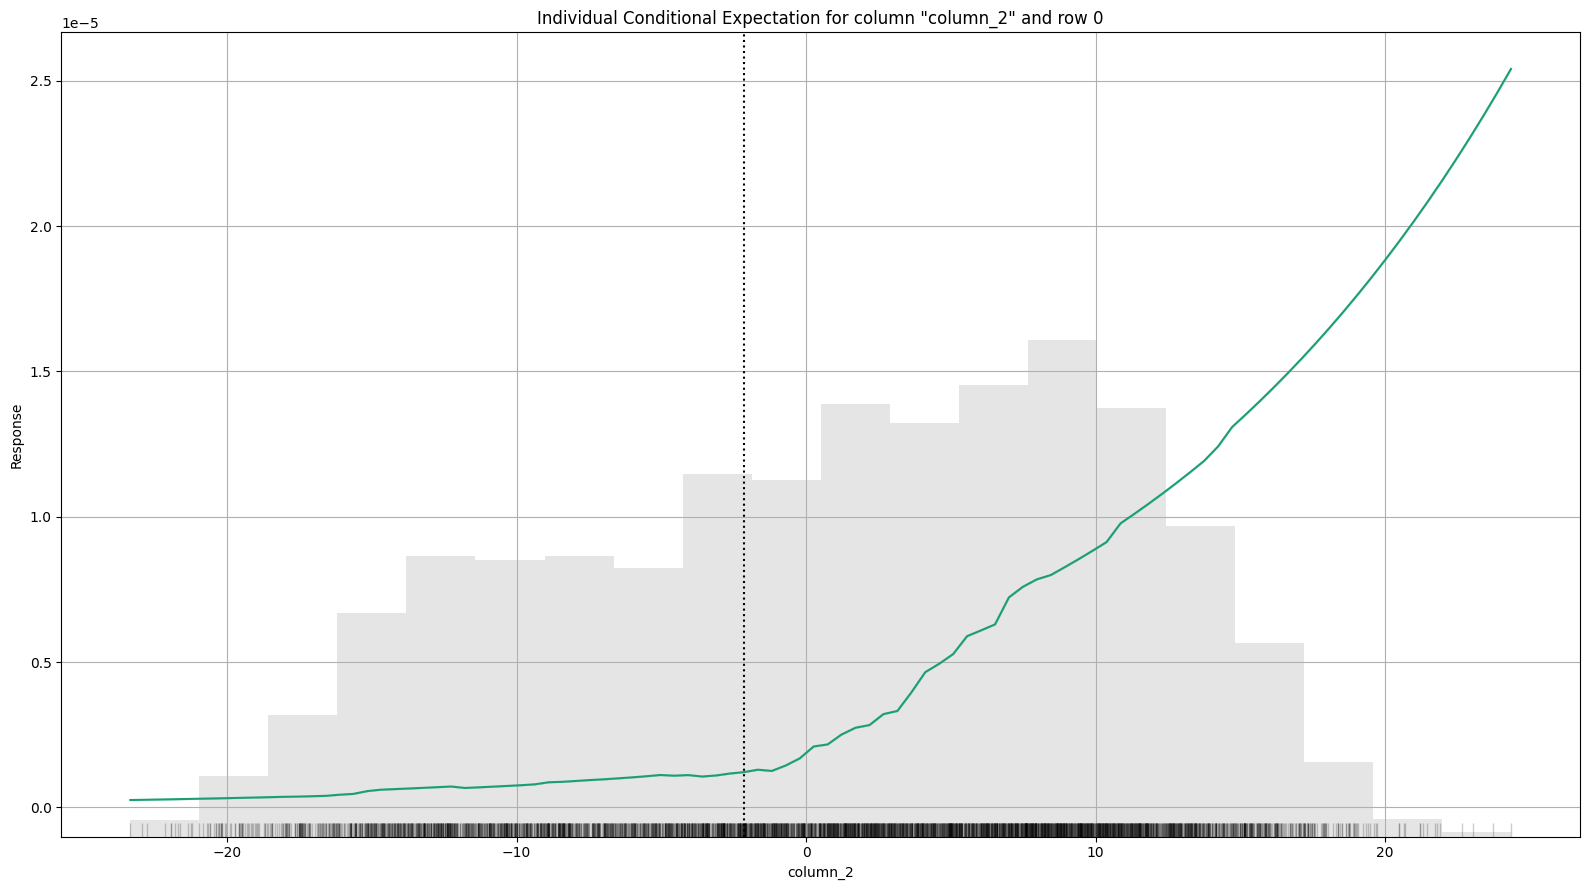

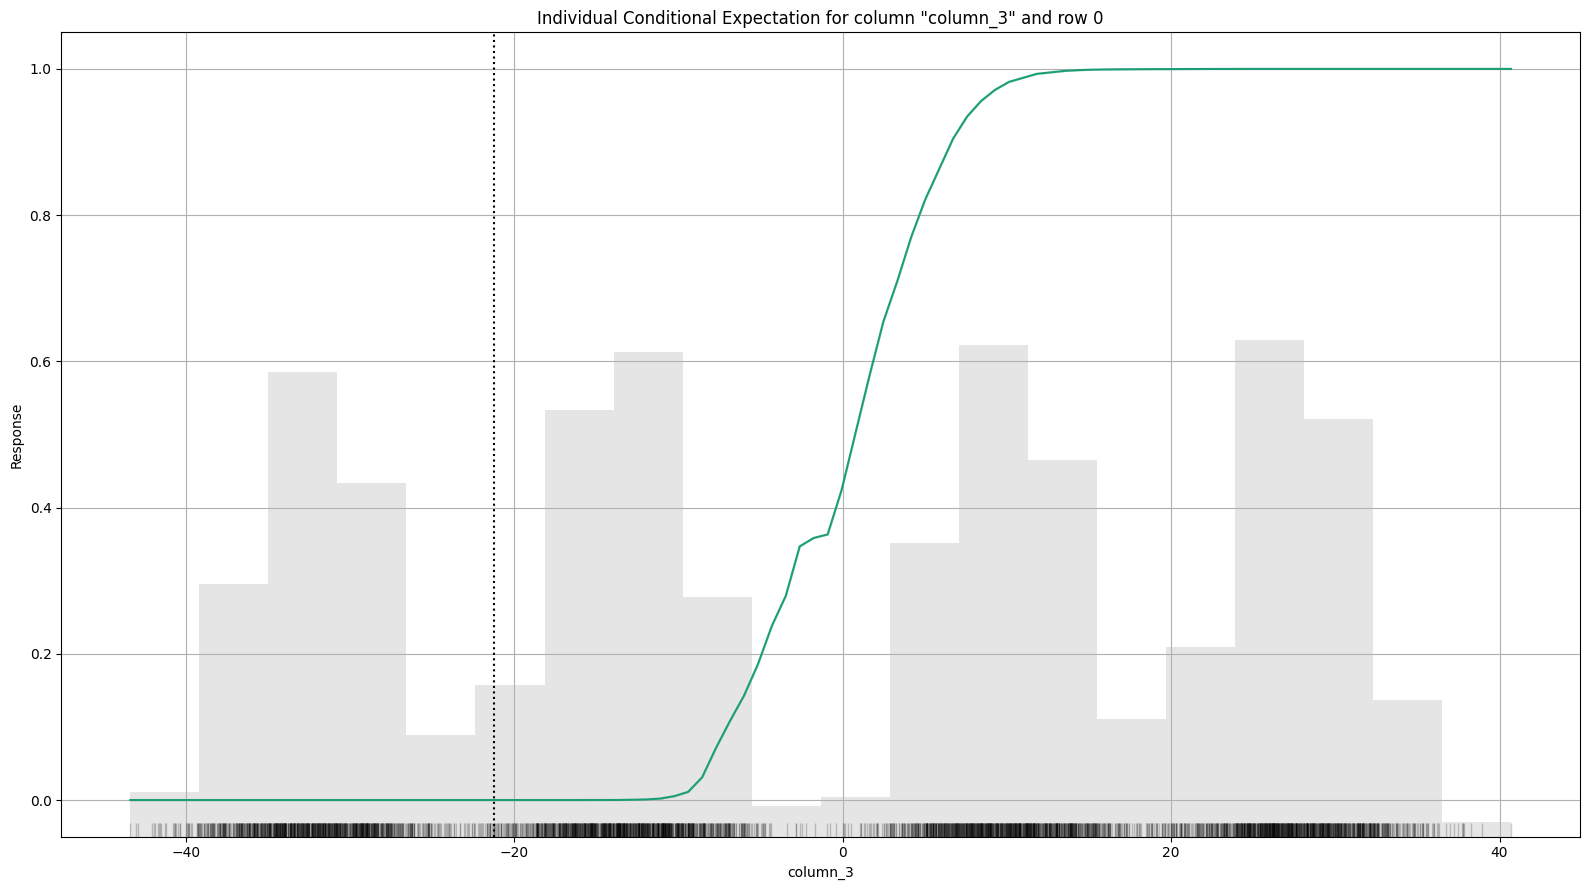

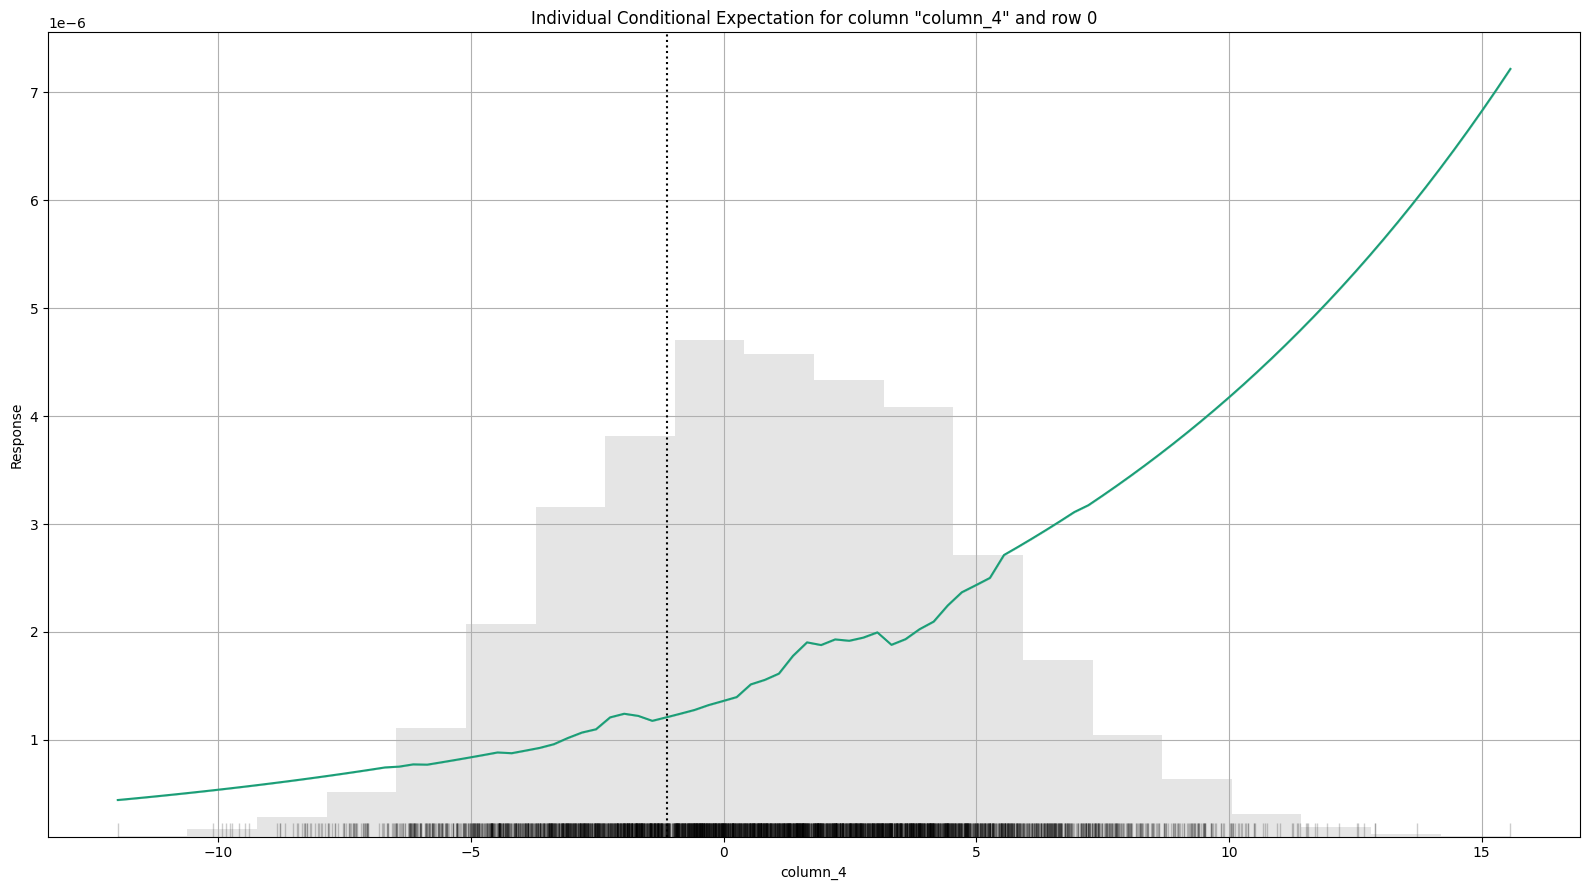

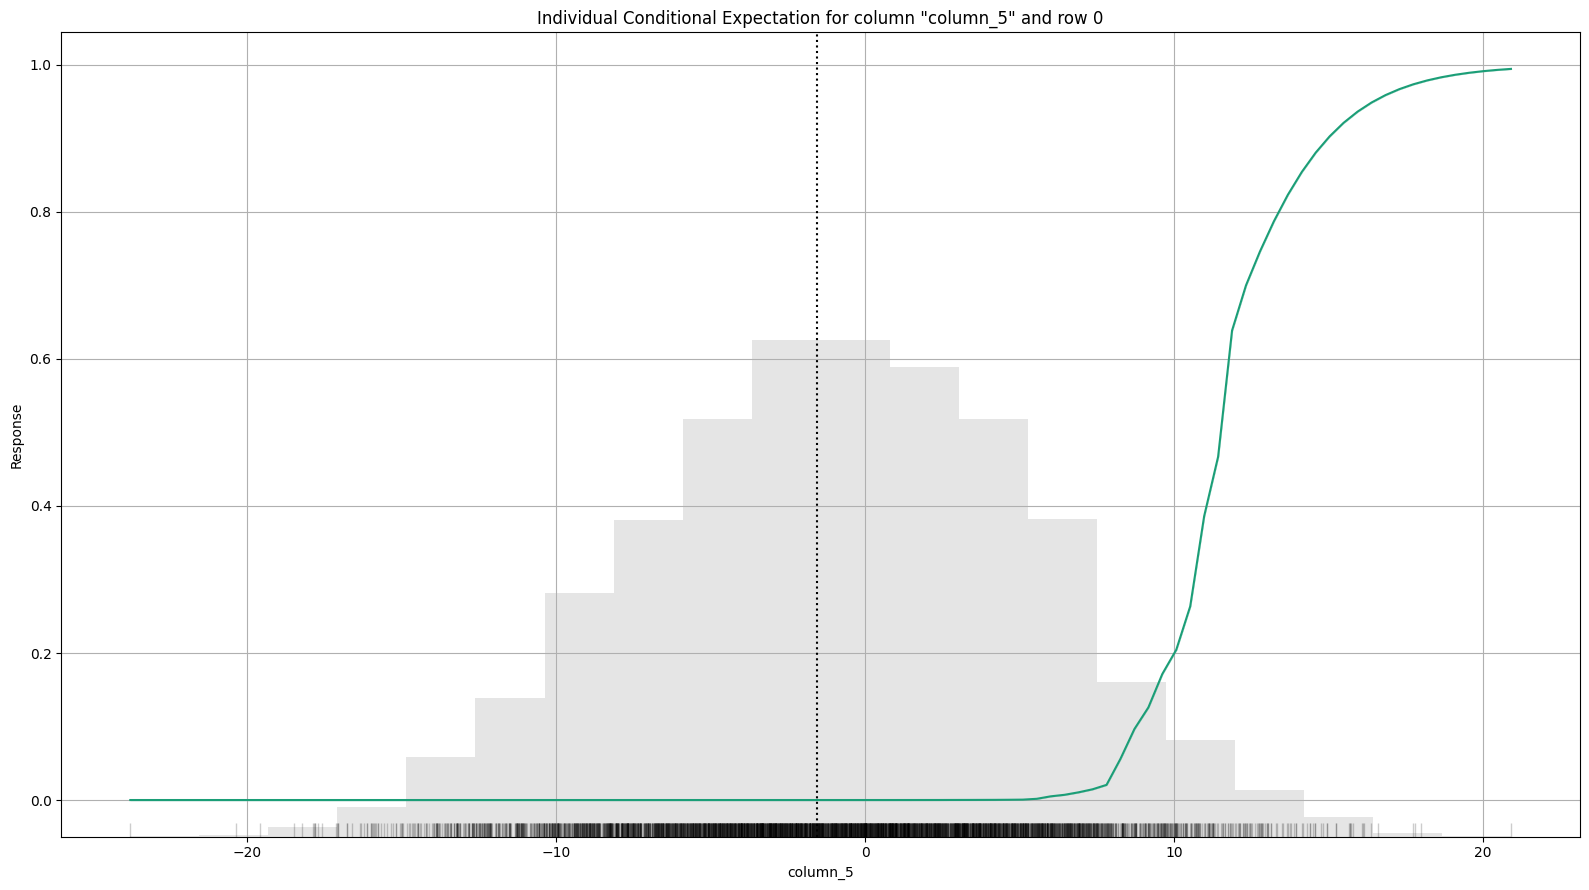

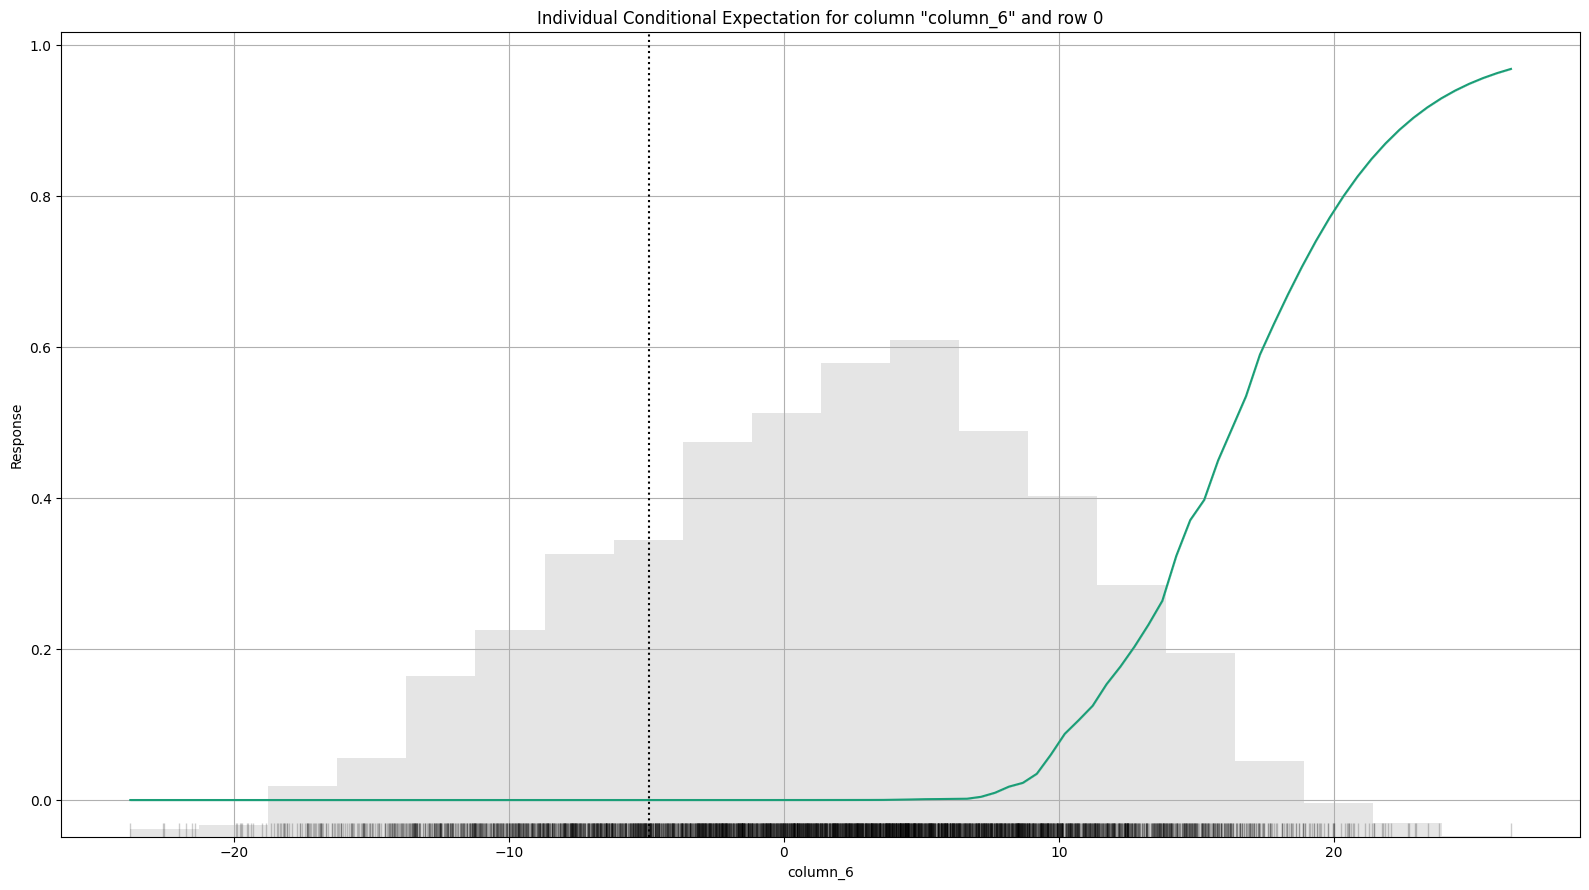

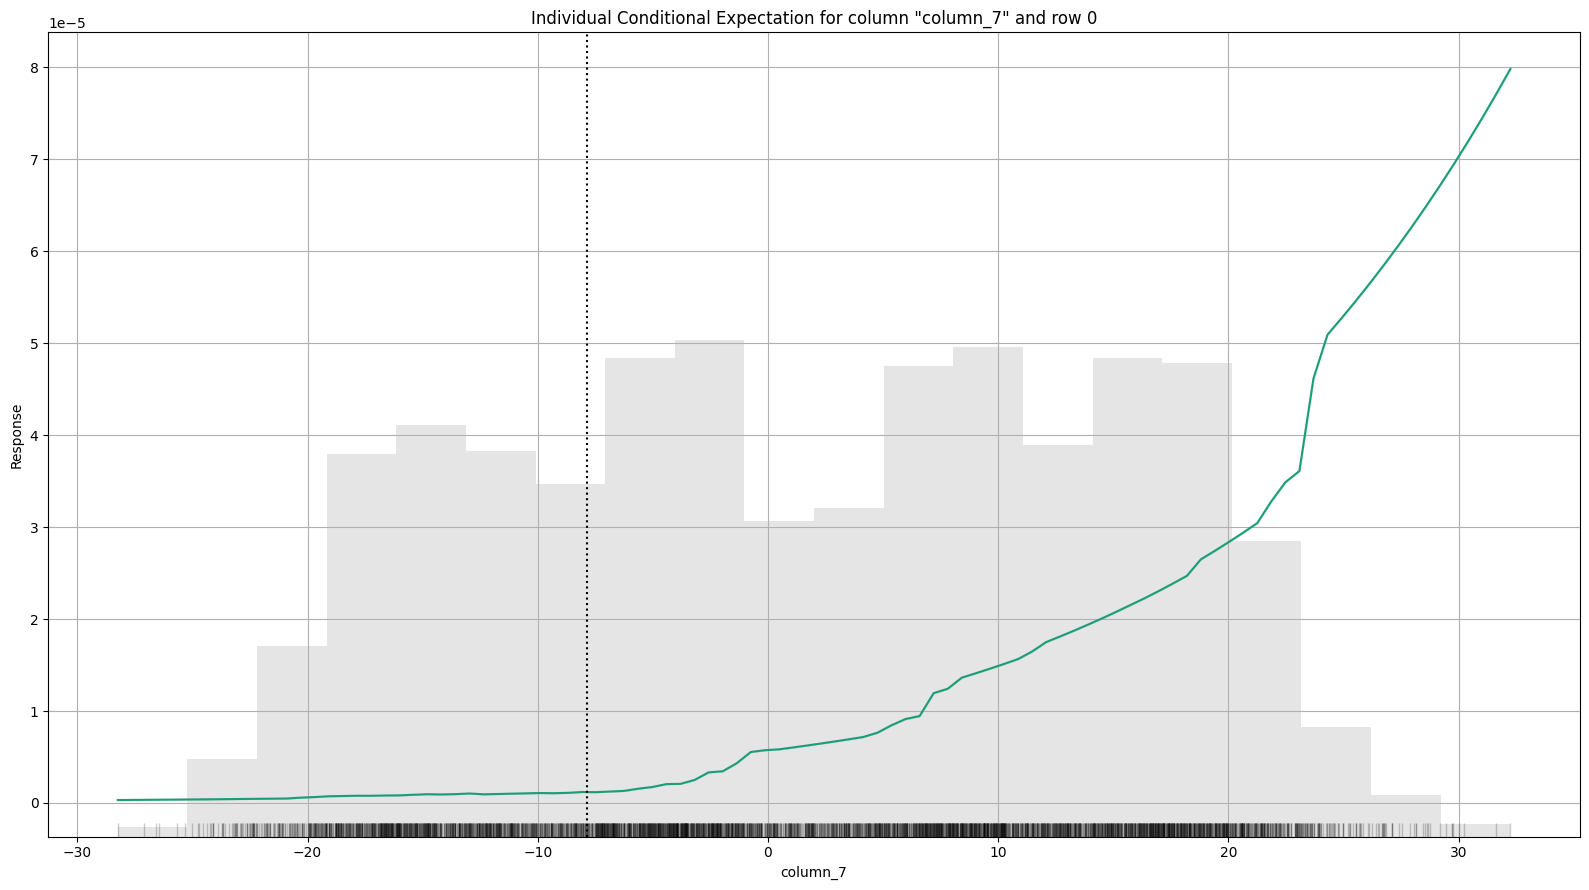

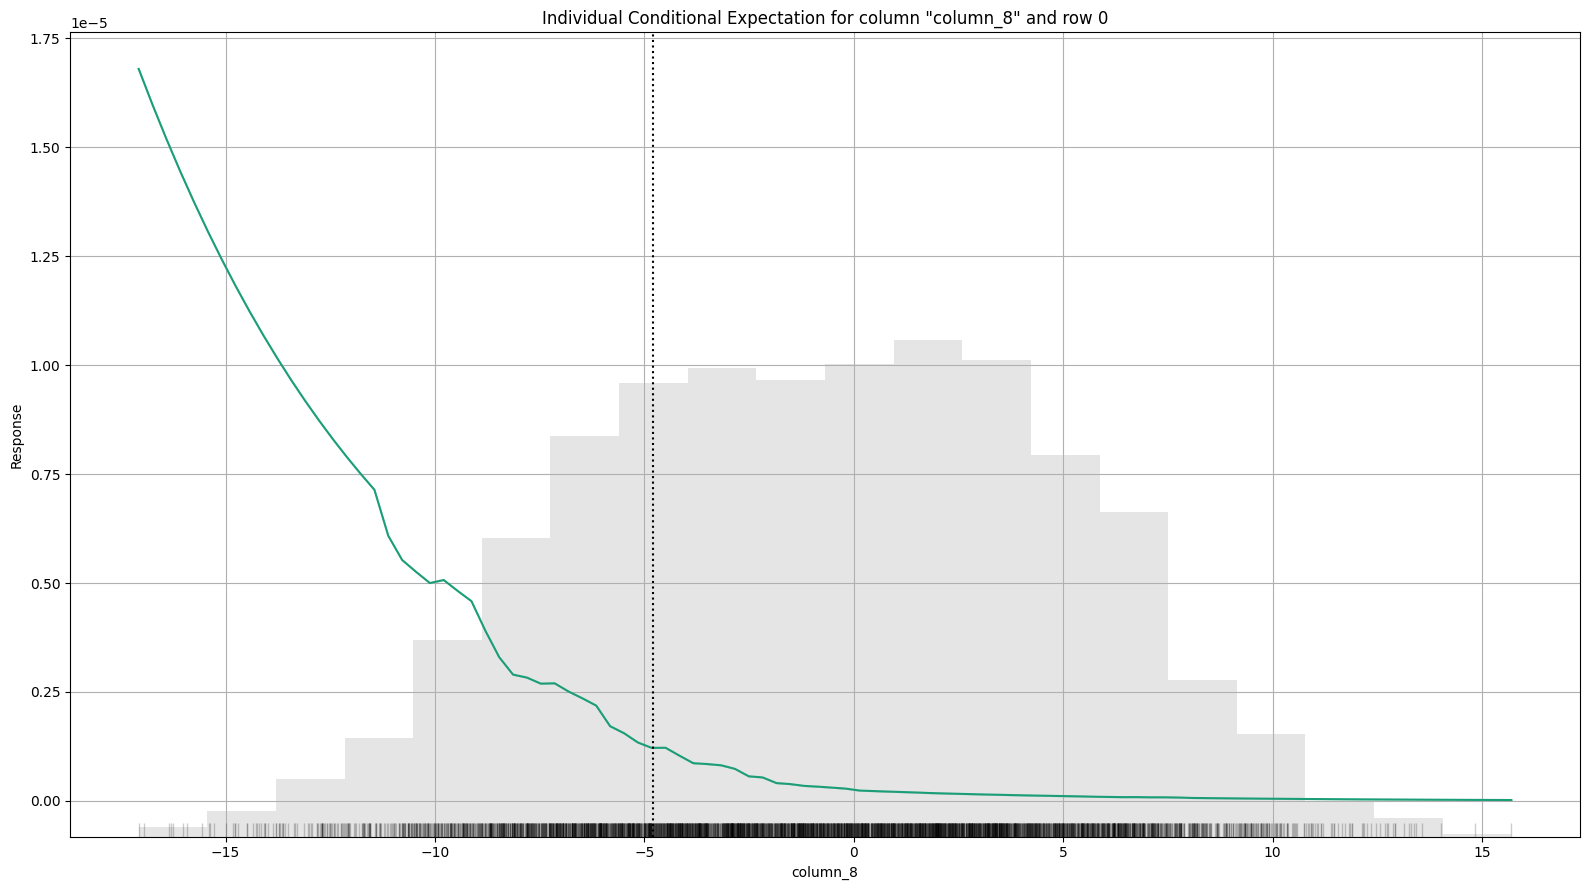

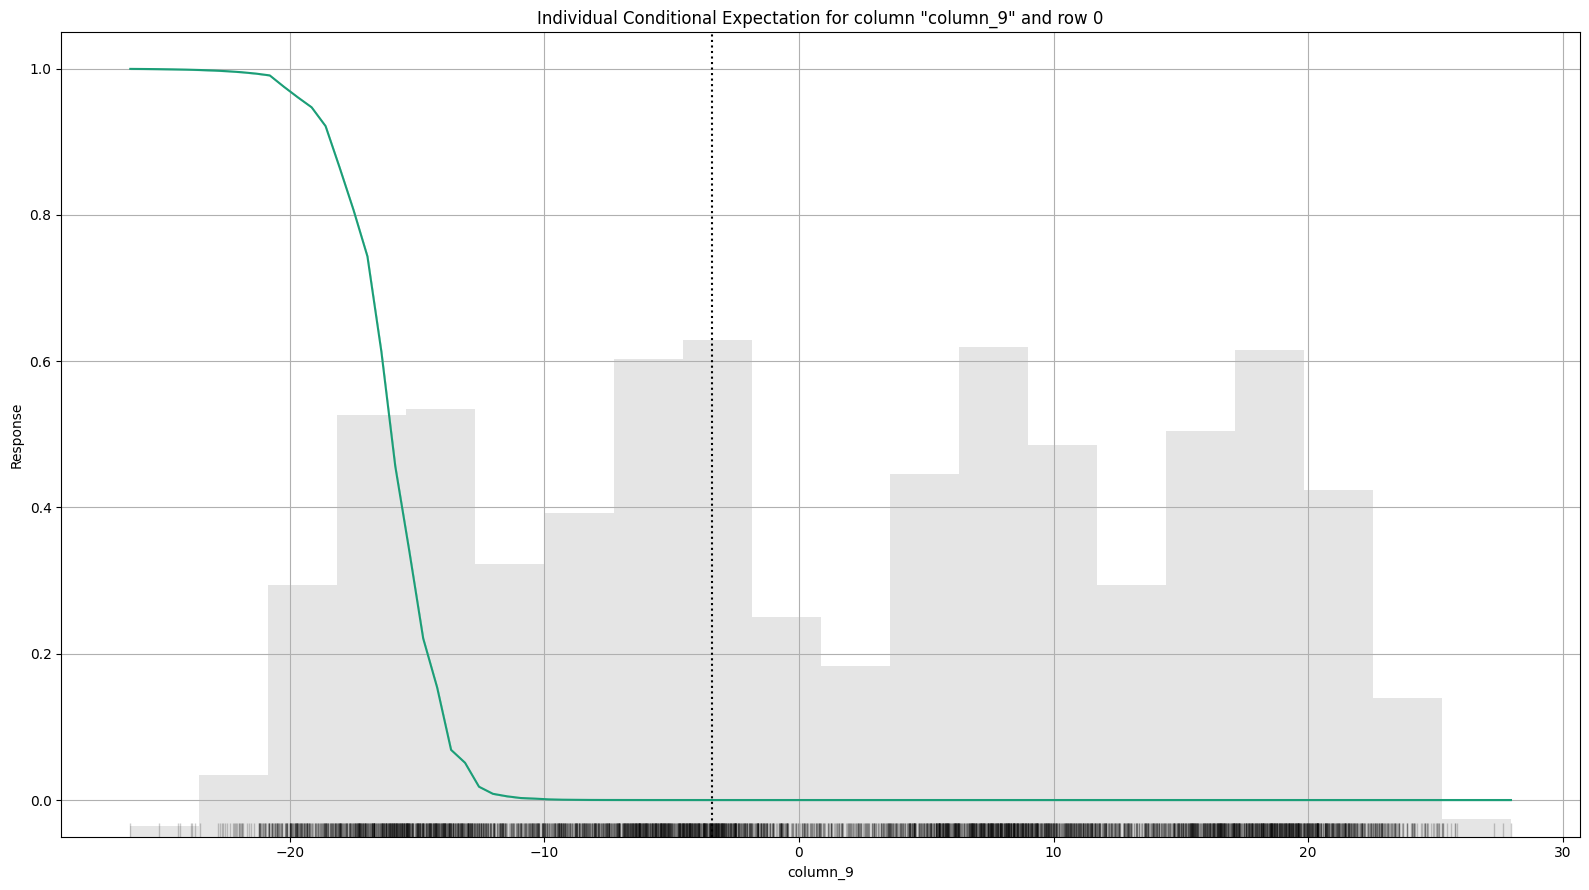

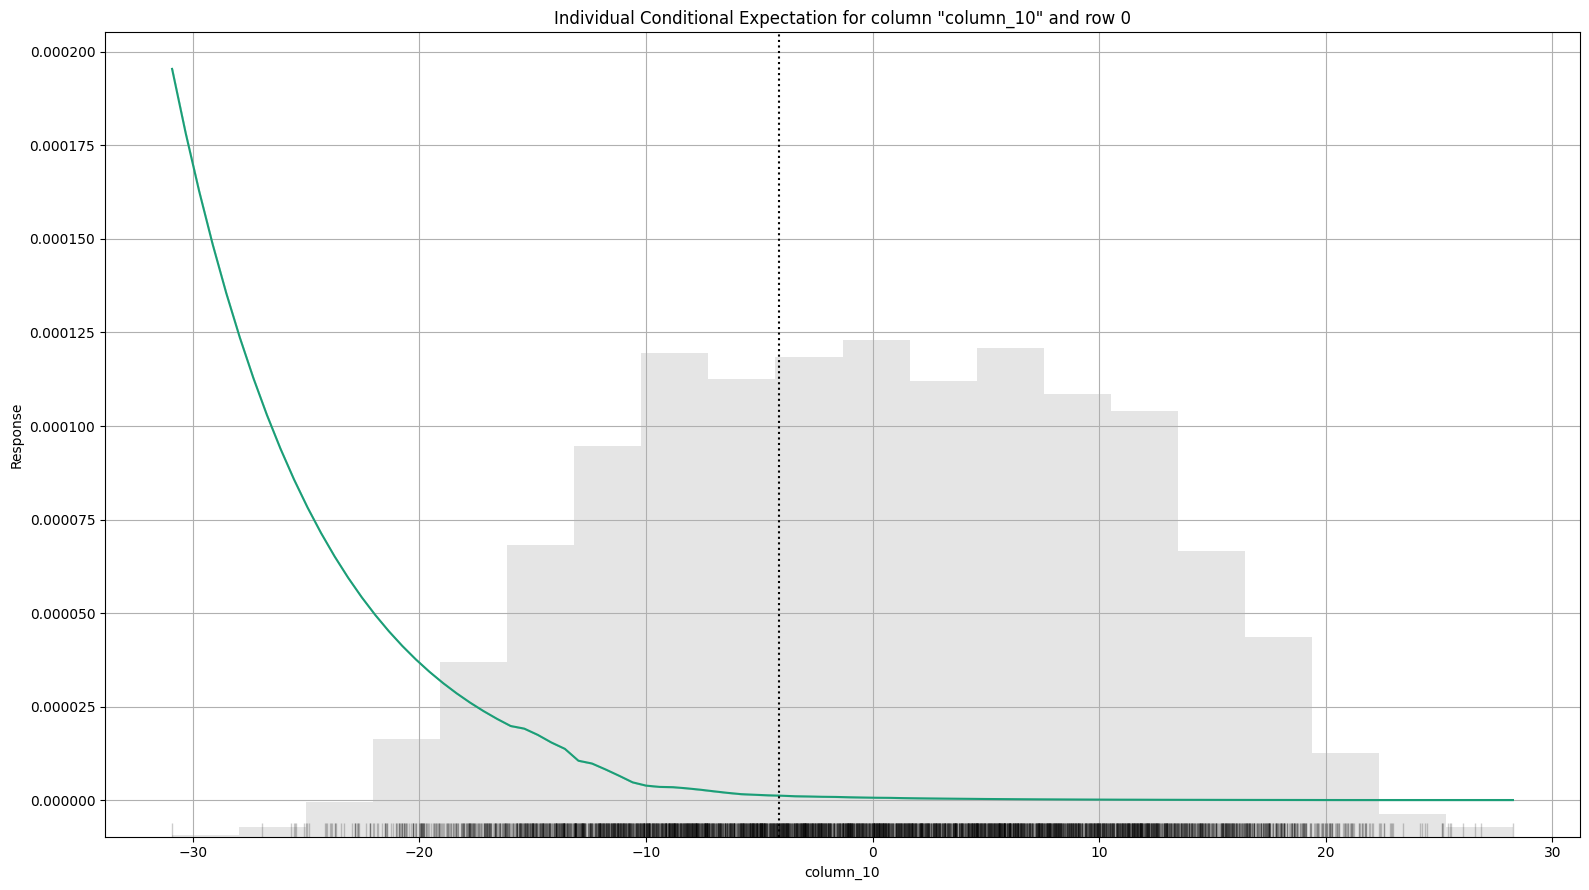

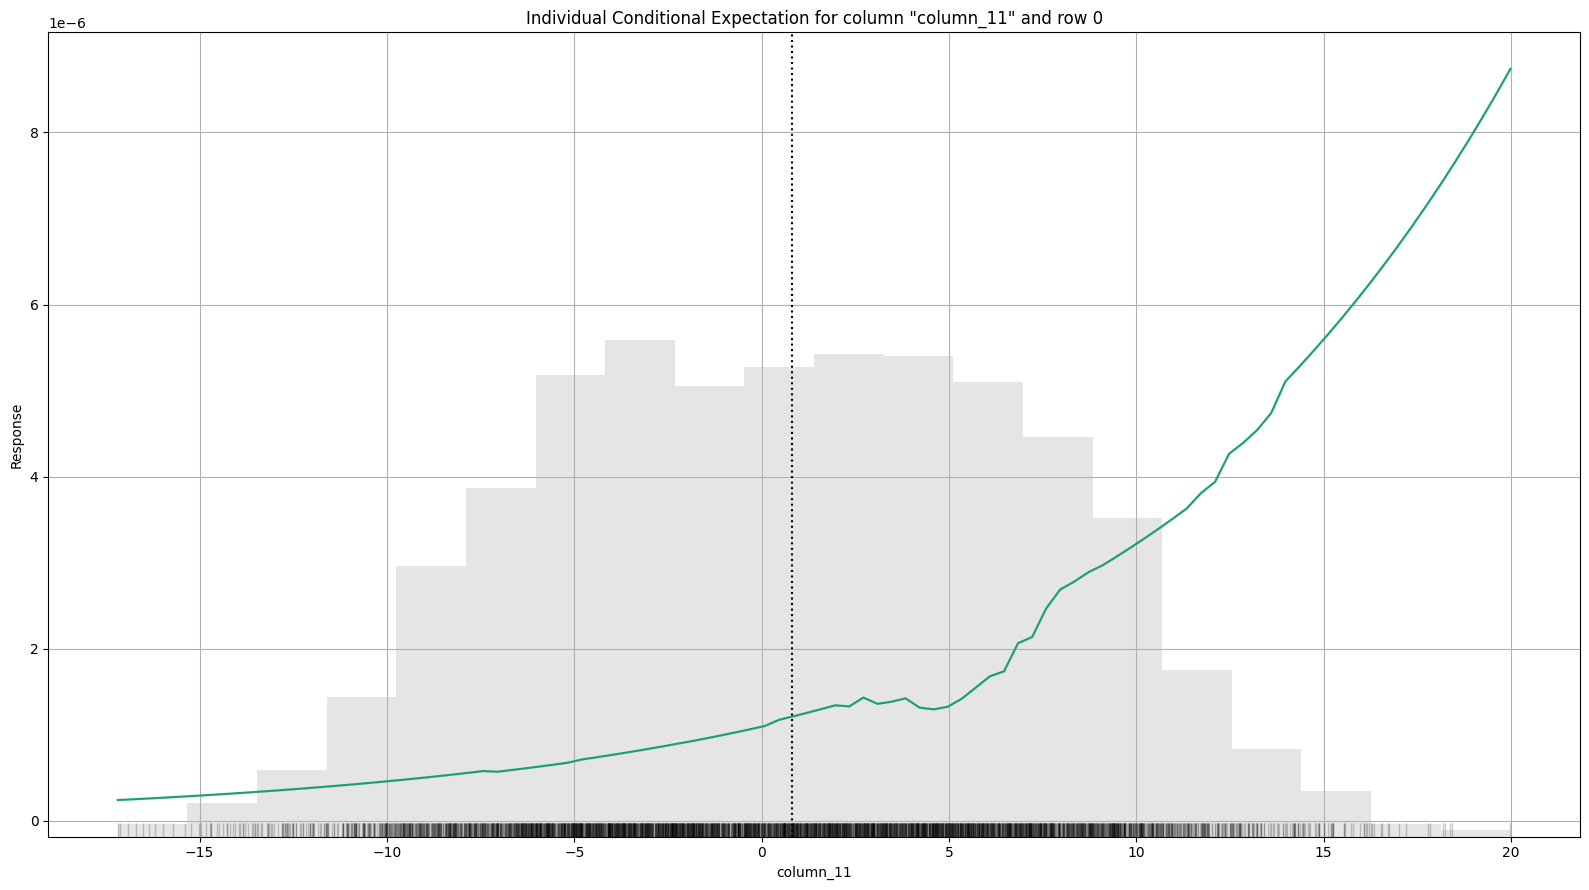

In [34]:
aml.explain_row(test, row_index=0)

In [35]:
aml.staged_predict_proba(test)

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Model type StackedEnsemble doesn't support Staged Predictions.
  Request: POST /3/Predictions/models/StackedEnsemble_BestOfFamily_1_AutoML_1_20240115_172334/frames/py_15_sid_8a49
    data: {'predict_staged_proba': 'True'}


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


  0%|          | 0/1 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
[0.00101613 0.00035364 0.0050357  0.29266263 0.00267579 0.05470641
 0.10615165 0.01327995 0.01640345 0.00791    0.00212607 0.00747717]


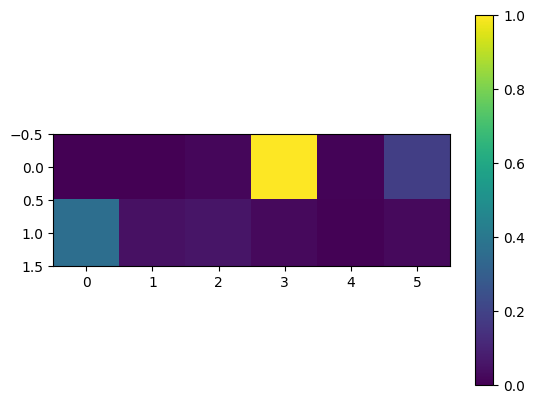

In [17]:
import shap
import matplotlib.pyplot as plt

def wrapped_model(x):
    column_names = [f'column_{i}' for i in range(12)]
    x = h2o.H2OFrame(x)
    x.col_names = column_names
    
    try:
        preds = aml.leader.predict(x).as_data_frame().to_numpy()[:, 0]
    except:
        preds = aml.predict(x).as_data_frame().to_numpy()[:, 0]
        
    return preds

to_be_explained = test.as_data_frame()[:1].drop('label', axis=1).to_numpy()
explainer = shap.KernelExplainer(wrapped_model, pd.read_csv('./Train.csv').drop('label', axis=1).sample(n=100))
shap_values = explainer.shap_values(to_be_explained)
relevance = abs(shap_values[0].ravel())


norm_relevance = ((relevance - min(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((2, 6)))
plt.colorbar()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Intercept 0.6063234863841045
Prediction_local [0.11344083]
Right: 1.2102633105198578e-06
[0.01207256 0.00695866 0.02428248 0.4283017  0.00580208 0.0540635
 0.19901562 0.02482568 0.05658645 0.16075627 0.03496783 0.00147508]


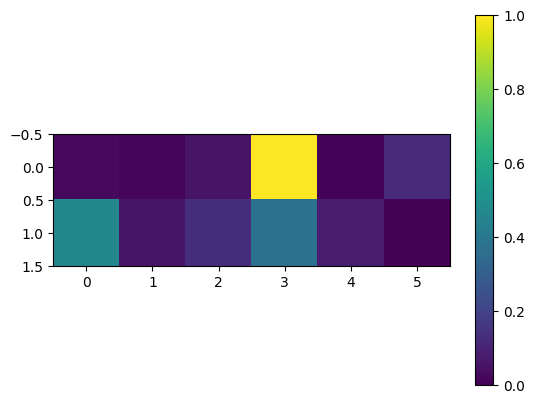

In [5]:
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt


def wrapped_net(x):
    column_names = [f'column_{i}' for i in range(12)]
    x = h2o.H2OFrame(x)
    x.col_names = column_names
    
    try:
        preds = aml.leader.predict(x).as_data_frame().to_numpy()[:, 1:]
    except:
        preds = aml.predict(x).as_data_frame().to_numpy()[:, 1:]
    return preds

background = pd.read_csv('./Train.csv').drop('label', axis=1).sample(n=100).to_numpy()
explainer = lime.lime_tabular.LimeTabularExplainer(
    background,
    feature_names=[str(i) for i in range(12)],
    verbose=True,
    mode='classification',
)

test = pd.read_csv('./Test.csv').drop('label', axis=1).to_numpy()[0]

exp = explainer.explain_instance(test, wrapped_net, num_features=12)
# exp.save_to_file('lime_explanationall.html')
# relevance = abs(np.asarray([float(i) for i in exp.domain_mapper.feature_values]))
relevance = abs(np.asarray([j for i, j in sorted(exp.local_exp[1], key=lambda i: i[0])]))
# relevance = exp.local_exp[1]
norm_relevance = ((relevance - min(relevance)) / (max(relevance) - min(relevance)))


print(relevance)
plt.imshow(norm_relevance.reshape((2, 6)))
plt.colorbar()